# Series

Series datastructure - In pandas library the Series, being the basic, is an indexed datastructure used to store and manipulate single or multi-dimensional indexed data.

Series is the core data structures in Pandas. You can think of it a cross between list and dictionary. The items are all stored in an order and there's labels with which you can retrieve them. An easy way to visualize this is 2 columns of data. The first is the special index, a lot like keys in a dictionary. While the second is your actual data. It's important to note the data column has a label of its own and can be retrieved using the .name attribute.
This is different than with dictionaries and is useful when it comes to merging multiple columns of data.

In [2]:
import pandas as pd

In [3]:
# You can create a series by passing in a list of values.
# When you do this, Pandas automatically assigns an index starting with zero
# and sets the name of the series to None. For eg:

# One of the ways to create a series is to use an array-like object, like a list.
students = ['Nitin', 'Rishabh', 'Simran']

# and turn it into a Series
pd.Series(students)

0      Nitin
1    Rishabh
2     Simran
dtype: object

In [1]:
# the result above is a Series object which is nicely rendered to the screen.
# We see here that pandas has automatically identified the type of data in this Series as "object" and set the dtype parameter as 'object'.
# Also, the values here are indexed with integers, starting at zero.

# Here, the result is of dtype of int64 objects

Pandas's series datastructure performs type-conversion wherever required

In [5]:
# If we create a list of strings and we have one element, a None type, pandas inserts it as a None and uses the type object for the underlying array.
# For eg:

students = ['Nitin', None, 'Ramesh']
pd.Series(students)

0     Nitin
1      None
2    Ramesh
dtype: object

In [25]:
# However, if we create a list of numbers, integers or floats, and put in the None type.
# pandas automatically converts this to a special floating point value designed as NaN i.e. "Not a Number"

marks = [245, None, 210]
x = pd.Series(marks)
x
# Well, it's basically evident for a numeric data of "None" type (i.e. meaning, it doesn't exist) to be actually type-casted
# to NaN (not-a-number) type because that data doesn't exist in reality.

0    245.0
1      NaN
2    210.0
dtype: float64

In [27]:
# Note here that pandas sets the dtype of this series to floating point numbers instead of object or int.
# It happens because - underneath, pandas represents NaN as a floating point number, so integers got type-casted to floats.

# So, whenever a list of integers you put into a Series is not floats, it's probably there is some missing data

****

In context of scientific computing it's important to stress that, NaN and None might be used by a data scientist in the same way, to denote missing data. But that underneath these are not represented by pandas in the same way.

NaN is "NOT" equivilent to None and when we try the equality test, the result is False.

In [31]:
import numpy as np

# generate a NaN value via NumPy library
np.nan == None

False

In [33]:
# It turns out that, an equality test of NaN to itself can't be done. Because when
# it's done the answer is always False.

np.nan == np.nan

False

In [34]:
# Instead, special functions can be used to test for the presence of NaN,
# such as numpy library isnan()

np.isnan(np.nan)

True

###### hence NOTE - when you come across NaN, it's meaning is similar to None, but it's a 
###### numeric value (mostly treated as `float64` type) and treated differently for efficiency reasons.

_________________________

A series can be created directly from dictionary data.
Here, index is automatically assigned to the keys of the dictionary that is provided by user and not just incrementing integers.

For eg:

In [50]:
students_score = {'Nitin': 'Physics',
                  'Rishabh': 'Math',
                  'Simran': 'English'}
s = pd.Series(students_score)
s

Nitin      Physics
Rishabh       Math
Simran     English
dtype: object

In [51]:
# We see that, since it was string data, pandas set the data type of the series to 'object'.
# We see that index, the first column, is also a list of strings.

# After creating the series, we can get the index object using the index attribute.
s.index

Index(['Nitin', 'Rishabh', 'Simran'], dtype='object')

As you play more with pandas you'll notice that a lot of things are implemented as numpy arrays, and have dtype value set.
This is true of indices, and here pandas infered that we were using objects for the index.

Now, this is kind of interesting. The dtype of object is not just for strings, but for arbitrary objects.
For eg:

In [52]:
# here, we take a list of tuples and convert it into a series.
students = [('Nitin','Sharma'), ('Rishabh', 'Barman'), ('Simran', 'Chopra')]
pd.Series(students)

0      (Nitin, Sharma)
1    (Rishabh, Barman)
2     (Simran, Chopra)
dtype: object

We see that each of the series of tuples is stored in series object, and type is object.

In [54]:
# You can also seperate your index creation from the data by passing in the index as a list explicitly
# to the series.

s = pd.Series(['Physics', 'Chemistry', 'English'], index=['Nitin', 'Rishabh', 'Simran'])
s

Nitin        Physics
Rishabh    Chemistry
Simran       English
dtype: object

So what happens if your list of values in the index object are not aligned with the keys in your dictionary for creating the series ?

Well, pandas overrides the automatic creation to favor only and only of the indices values that you provided. So it will ignore from your dictionary all keys which are not in your index, and pandas will add None or NaN type values for your index value you provided, which is not in your dictionary key list.

In [59]:
# For example,

# let's create a dictionary of 3 items - students & thier courses.
students_scores = {'Nitin': 'Physics',
                   'Rishabh': 'Chemistry',
                   'Simran': 'English'}

# When I create the series object though I'll only ask for an index with 3 students,
# and I'll exclude Rishabh
s = pd.Series(students_scores, index=['Nitin', 'Simran', 'Arpan'])
s


# the result is that the Series "s" object doesn't have Rishabh in it, even though he was in our original dataset,
# but it explicitly does have Arpan in it as a missing value.

Nitin     Physics
Simran    English
Arpan         NaN
dtype: object

### Structure of a Series | Querying a Series | Merging Series objects together

- A pandas Series can be queried either by the index position or the index label.

- If you don't give an index to the series when querying, the position and the label are effectively the same values.

- To query by numeric location, starting at zero, use the iloc attribute.

- To query by the index label, you can use the loc attribute.

- `.iloc` refers to the **position**.

- `.loc` refers to the **index**.

In [63]:
# For example, let's a create a dictionary of students enrolled in classes.

import pandas as pd
students_classes = {'Nitin': 'Physics',
                    'Rishabh': 'Math',
                    'Simran': 'English',
                    'Samer': 'History' }
s = pd.Series(students_classes)
s

Nitin      Physics
Rishabh       Math
Simran     English
Samer      History
dtype: object

In [64]:
# So, for this series, if you want to see the fourth entry we would use the iloc attribute with parameter 3.
s.iloc[3]

'History'

In [70]:
# If you want to see the class Simran has, we would use loc attribute with Simran as parameter.
print(s.loc['Simran'])

English


##### Note:
Keep in mind that <b>iloc and loc are <b>attributes, and not methods.</b>

So you don't use paranthesis to query them, but sqaure brackets instead, which is called the indexing operator.
In Python, this call a get or set for an item on the context of its use.

In [72]:
# this can also be achieved by using an integer parameter,
s[2]

# because, the operator will behave as if you want it to query via iloc attribute.

'English'

In [75]:
# if you pass in an object, it will query as if you wanted to use the label based loc attribute.
print(s['Samer'])
print(s['Rishabh'])

History
Math


<b>So what happens if your index is a list of integers ?</b>

This is a bit complicated and Pandas cannot determine automatically whether you're intending to query by position or index label.

So you need to be careful when using the indexing operator on the Series itself. The safer option is to be more explicit and use the iloc or loc attributes directly.

Indices of a Series data could be **Float type** too.

In [78]:
# for example; the class and their classcode info are given here, where classes are indexed by classcodes, in the form of integers
class_code = {99: 'Physics',
              100: 'Chemistry',
              101: 'English',
              102: 'History'}
s = pd.Series(class_code)
s

99       Physics
100    Chemistry
101      English
102      History
dtype: object

In [81]:
# if we try to call s[1] we get a key error because there's no item in the classes list with an index of one, instead we have to call iloc explicitly if we want the second item.
s[1]

KeyError: 1

In [83]:
# Well because it didn't s.ioc[1] underneath as one might expect, instead it generates an error.

# so, s.iloc[1] will produce the desired result.
s.iloc[1]

'Chemistry'

_____________________________________

### Vectorization

<p>Now we know how to get out of the series, let's talk about working with the data. A common task is to want to consider all of the values inside of a series and do some sort of operation. This could be trying to find a certain number, or summarizing data or transforming the data in some way.<br><br>
A typical programatic approach to this would be to iterate over all the items in the series, and invoke the interested operation.<br>
For instance, we could create a Series of integers representing student grades, and calculate the average.</p>

In [108]:
grades = pd.Series([80, 82, 95, 84, 83, 97])

total = 0
for grade in grades:
    total += grade
print(total/len(grades))

86.83333333333333


<p>This works, but it's slow. Modern computers can do many tasks simultaneously, especially, but not only, tasks involving mathematics.<br>
Pandas and the underlyimg numpy libraries support a method of compution called <strong>vectorization.</strong>
Vectorization works with most of the functions in numpy library, including the sum function.<br><br>
Here's how we write the code using numpy sum method.</p>

In [171]:
import numpy as np

total = np.sum(grades)      # passing an iterable item inside sum()
print(total/len(grades))

86.83333333333333


Now both of these methods create the same value, <i><b>but vectorization is actually faster than operating via loops.</b></i>
Jupyter Notebook has a magic function which can help to demonstrate this.

In [ ]:
# the iPython interpreter has something called magic function that begin with a percentage sign.
# to view list of these functions, type % sign and hit 'tab' key.
# Custom magic functions can also be created by oneself.

# Here, we would use cellular magic function. These start with 2 percentage signs and wrap the code in Jupyter cell.
# The function used here is called timeit. This function will run our code for a few times to etermine, on average, how long it takes.
# You can speciufy how many number of loops that timeit shall run. However, by default, it is 1000 loops.

# Note: in order to use a cellular magic function, it has to be the first line in the cell.

In [117]:
# create a big series of random numbers.
numbers = pd.Series(np.random.randint(1,1000,10000))

In [137]:
%%timeit -n 1000
total = 0
for number in numbers:
    total += number

total/len(numbers)

998 µs ± 7.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [134]:
%%timeit -n 1000
total = np.sum(numbers)
total/len(numbers)

54.8 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Well, you can notice the performance difference yourself.<br>
This is the advantage of vectorization - that amplifies the ability of a computer to execute multiple instructions at once.

#### Broadcasting
A related feature in pandas and numpy is called broadcasting. With broadcasting, an operation can be applied to every value in the series.

For example: Let's notice the performance difference between incrementing a series by value of 2.

I. The procedural way i.e. Iterating the series

In [181]:
%%timeit -n 10

s = pd.Series(np.random.randint(0,100,1000))

# incrementing 's' series by 2
for label,value in s.iteritems():
    s.loc[label] = value + 2
    
# iteritems() function returns a label and a value, which is tuple type.

41.4 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


II. Broadcasting

In [178]:
%%timeit -n 10

s = pd.Series(np.random.randint(0,100,1000))
s += 2

192 µs ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<b>Hence, broadcasting is significantly faster than doing same operation via iteration.</b>

One note on using the indexing oprators to access series data. The .loc attribute not only modifies data in place, but also add new data as well. If the value that's passed in as index doesn't exist, then a new entry is added.

Indices can be of mixed types. Pandas will automatically change the underlying NumPy types as appropriate.<br>
For eg:

In [184]:
s = pd.Series([1, 4, 7])

s.loc['English'] = 88

s

0           1
1           4
2           7
English    88
dtype: int64

In [186]:
# i.e. we see that mixed types for data values of index labels are no problem for Pandas. Since 'English' is not in the original list of indices,
# s.['English'] essentially creates a new element in the series, with the index named 'English', and value of 88

##### An example to show a Series can accept index values of different datatype

In [197]:
studentClasses = pd.Series({
                            'Rishabh': 'Physics',
                            'Nitin': 'Math',
                            'Simran': 'Hindi',
                            'Kevin': 'History'})

studentClasses

Rishabh    Physics
Nitin         Math
Simran       Hindi
Kevin      History
dtype: object

In [198]:
# let's create a Series just for some new student Ravi, which lists all courses he has taken.
raviClasses = pd.Series(['Philosophy', 'Arts', 'Math', 'English'], index=['Ravi', 'Ravi', 'Ravi', 'Ravi'])
raviClasses

Ravi    Philosophy
Ravi          Arts
Ravi          Math
Ravi       English
dtype: object

In [201]:
allStudents = studentClasses.append(raviClasses)
print(allStudents)

Rishabh       Physics
Nitin            Math
Simran          Hindi
Kevin         History
Ravi       Philosophy
Ravi             Arts
Ravi             Math
Ravi          English
dtype: object


In [202]:
# .append() method does not actually change the Series objects, it instead returns a new series which is made up of the 2 appended together.
# This is a common pattern in pandas - by default returning a new object instead of modifying the one in place.

studentClasses

Rishabh    Physics
Nitin         Math
Simran       Hindi
Kevin      History
dtype: object

In [204]:
# you can see that studentsClasses series is intact and hasn't been modified. Instead append operation itself returned a new series object which we stored as allStudents variable.

In [210]:
print(allStudents.loc['Nitin'])   # query the final-appended series for Nitin

print(allStudents.loc['Ravi'])    # query the final-appended series for Ravi will get a series itself.

Math
Ravi    Philosophy
Ravi          Arts
Ravi          Math
Ravi       English
dtype: object


****
# DataFrame

DataFrame is conceptually a 2-D series object, where there's an index and multiple columns of content, with each column having a label. In fact, the distinction between a column and a row is only a conceptual distinction.

DataFrame can be thought itself as simply a 2-axis labelled array.

In [1]:
import pandas as pd

**Example 1 :**

In [2]:
# Let's create 3 school records for students and their class grades.
# I'll create each as a series which has a student name, the class name, and the score.

record1 = pd.Series({'Name': 'Rishabh',
                     'Class': 'Math',
                     'Score': 94})

record2 = pd.Series({'Name': 'Nitin',
                     'Class': 'Chemistry',
                     'Score': 89})

record3 = pd.Series({'Name': 'Simran',
                     'Class': 'Physics',
                     'Score': 91})

print(record1)

Name     Rishabh
Class       Math
Score         94
dtype: object


Like a Series, the DataFrame object is index. Here, we'll use a group of series, where each series represents a row of data. Just like the Series function, we can pass in our individual items in an array, and we can pass in our index values as a second arguments.

<b>You can think like, in a DataFrame each column or row is a Series in itself</b>

In [3]:
recordDF = pd.DataFrame([record1, record2, record3], index=['school1', 'school2', 'school3'])

recordDF

,Name,Class,Score
school1,Rishabh,Math,94
school2,Nitin,Chemistry,89
school3,Simran,Physics,91


In [301]:
print(recordDF['Name'])
type(recordDF['Name'])

school1    Rishabh
school2      Nitin
school3     Simran
Name: Name, dtype: object


pandas.core.series.Series

**Example 2 :**

In [269]:
# an alternative method is by creating a list of dictionaries, where each dictionary represents a row of data.

students = [{'Name': 'Rishabh',
             'Class': 'Math',
             'Score': 94},
            {'Name': 'Nitin',
             'Class': 'Chemistry',
             'Score': 89},
            {'Name': 'Simran',
             'Class': 'Physics',
             'Score': 91}]

# now, pass this list of dictionaries into the DataFrame function
studentsDF = pd.DataFrame(students, index=['school1', 'school2', 'school1'])
studentsDF

,Name,Class,Score
school1,Rishabh,Math,94
school2,Nitin,Chemistry,89
school1,Simran,Physics,91


**Example 3 :**

In [14]:
car_data = pd.Series(['Toyota', 'Honda', 'Ford', 'Tata'])

car_data

0    Toyota
1     Honda
2      Ford
3      Tata
dtype: object

In [15]:
color = pd.Series(['White', 'Red', 'Black', 'Indigo'])
color

0     White
1       Red
2     Black
3    Indigo
dtype: object

In [16]:
carDF = pd.DataFrame({"Car Manufacturer": car_data, "Color shade": color})

carDF

,Car Manufacturer,Color shade
0,Toyota,White
1,Honda,Red
2,Ford,Black
3,Tata,Indigo


### Extracting data via 'loc' and 'iloc' attributes with DataFrames

Similar to the series, we can extract data using the <b>.iloc and .loc</b> attributes.
Because the DataFrame is 2-D, passing a single value to the loc indexing operator will return the series if there's only one row to return.

In [270]:
studentsDF.loc['school2']

# we can notice that name of the series is returned as the index value, while the column name is included in the output.

Name         Nitin
Class    Chemistry
Score           89
Name: school2, dtype: object

In [315]:
# It's important to remember that the indices and cloumn names along either axes, horizontal or vertical, could be non-unique.
# In this example, we see two records for school1 as different rows.
# If we use a single value with DataFrame loc atribute, multiple rows of the DataFrame will return, not as a new Series, but as new DataFrame.

studentsDF.loc['school1']

,Name,Class,Score
school1,Rishabh,Math,94
school1,Simran,Physics,91


In [276]:
print(type(studentsDF.loc['school1']))   # typeof for school1 is DataFrame

print(type(studentsDF.loc['school2']))   # typeof for school2 is Series

# so you may notice here the difference in datatypes

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


One of the powers of the Pandas' DataFrames is that you can quickly slelect data based on multiple axes. For instance, if you wanted to just list the student names for school1, you would supply two parameters to .loc , the row index and other being the column index.

In [278]:
# for example, if we want to get student names of school1
studentsDF.loc['school1', 'Name']

school1    Rishabh
school1     Simran
Name: Name, dtype: object

In [323]:
# if we want to get student names only
# i.e., you want to select out the "Name" column from studentsDF dataframe.
print(studentsDF.T.loc['Name'])   # here .T is done to transpose

print("\nAn another way to do same is studentsDF['Name'] =>\n" )

print(studentsDF['Name'])

school1    Rishabh
school2      Nitin
school1     Simran
Name: Name, dtype: object

An another way to do same is studentsDF['Name'] =>

school1    Rishabh
school2      Nitin
school1     Simran
Name: Name, dtype: object


In [324]:
# However, since iloc and loc are used for row selection, Panda reserves the indexing operator
# directly on the DataFrame for column selection. In a panda's DataFrame, columns always have a name.
# So this selection is always label based, and is not as confusing as it was when using the square bracket operator on series objects.
# This operator is analogous to column projection, as in scenarios of relational DBs.

studentsDF['Name']


school1    Rishabh
school2      Nitin
school1     Simran
Name: Name, dtype: object

In [326]:
type(studentsDF['Name'])    # result of a single column projection is a Series object

pandas.core.series.Series

In [327]:
# Since the result of using the indexing operator is either a DataFrame or Series; chaining of operations can be done.

# For instance, select all rows which relates to school1 using .loc, then project the Name column from those rows.
studentsDF.loc['school1']['Name']

school1    Rishabh
school1     Simran
Name: Name, dtype: object

In [329]:
# checking the type of the responses from resulting operations
print(type(studentsDF.loc['school1']))          # it's a DataFrame
print(type(studentsDF.loc['school1']['Name']))  # it's a Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<b>Chaining</b>, by indexing on the return type of another index, can come with some costs and is best avoided if you can use another approach. In particular, chaining tends to cause Pandas to return a copy of the DataFrame instead of a view on the DataFrame.

For selecting data, this is not a big deal though it might be slower than necessary when dealing with large datasets.

Here's an another approach.<br>
As we saw, .loc does row selection and it can take 2 parameters,<br>
the row index and list of column names.

The .loc attribute also supports slicing. If you want to select all rows,  use a colon to indicate a full slice from beginning to end. Then, add the column names as the second parameter as a string. If multiple columns are required; so pass the column names in a list and Pandas will bring back only the column names that were asked for.

For example, we need names and scores of all students :

In [335]:
studentsDF.loc[:, ['Name', 'Score']]

# colon means that selecting up all the rows, and the list in second argument position is the list of columns we want to get hold of.

,Name,Score
school1,Rishabh,94
school2,Nitin,89
school1,Simran,91


That's selecting and rojecting data from a DataFrame based on row and column labels. The key concepts to remember are that the row and columns are really just for our benefit. Underneath, this is a just 2 axes labelled array.

Also, consider the issue of chaining carefully, and try to avoid it, as it can unpredictable results, where intention was to obtain a view of the data, but instead Pandas returns a copy of it.

____________________

### Dropping Data

It's easy to delete data in Series and DataFrames; drop function is used to do so.

drop( ) => takes a single prameter, which is the index or row or column label, to drop.

The drop function doesn't change the DatFrame by default! Instead, the drop function returns a new copy of the DataFrame with the given rows removed.

more info here, [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html]

In [337]:
studentsDF.drop('school1')    # returns a new DataFrame after dropping the 'school1' row

,Name,Class,Score
school2,Nitin,Chemistry,89


In [338]:
studentsDF    # original studentsDF DataFrame is intact

,Name,Class,Score
school1,Rishabh,Math,94
school2,Nitin,Chemistry,89
school1,Simran,Physics,91


Drop has some interesting parameters -

1st is called inplace, and if it's set to true, the DataFrame will be updated in place, instead of a copy being returned.

2nd parameter is the axes, which requires to be dropped. By default, axes is set to 0, i.e. the row axis. If set to 1, means you can drop a column.

In [351]:
stDF = studentsDF.copy()   # just creating a copy of studentsDF dataframe for further operations
stDF

,Name,Class,Score
school1,Rishabh,Math,94
school2,Nitin,Chemistry,89
school1,Simran,Physics,91


In [352]:
# dropping off 'Score' column
stDF.drop("Score", inplace=True, axis=1)
stDF

,Name,Class
school1,Rishabh,Math
school2,Nitin,Chemistry
school1,Simran,Physics


There is an another way to drop a column, and that's directly through the use of indexing operator, using the del keyword. This way of dropping data takes immediate effect on the DataFrame and does not return a view.

In [353]:
del stDF['Class']     # drops off 'Class' column from the original array
stDF

,Name
school1,Rishabh
school2,Nitin
school1,Simran


### Adding a new column

Adding a new column to the DataFrame is as easy as assigning it to some value using the indexing operator. For instance, if we want to add a 'Rank' column with default value of None, we can do so using assignment operator after squre brackets. This broadcasts the default value to the new column immediately.

In [355]:
studentsDF['Rank'] = None
studentsDF

,Name,Class,Score,Rank
school1,Rishabh,Math,94,None
school2,Nitin,Chemistry,89,None
school1,Simran,Physics,91,None


### DataFrame Indexing and Loading

A common flow using Pandas is to read the datasets in, usually from some external file, then begin to clean and manipulate the dataset for analysis.

In [403]:
# "cat" i.e. 'concatenate', outputs the contents of a file.
# In Ipython, if we prepend the line with an exclamation mark it will execute the remainder of the line as a shell command.

!cat ./datasets/Health-Tweets/latimeshealth.txt

#### Renaming columns of a CSV file

In [9]:
# The data set has been taken from UCI Machine Learning Repository.
# In this data set, the dependent variable is "target".
# It is a binary classification problem - to predict if the salary of a given person is less than or more than 50K.

df = pd.read_csv('./datasets/train.csv')

df.info()    # check info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [499]:
df.head()

# by default, index for a dataframe starts with 0

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [500]:
dfNew = df.rename(columns = {'age': 'Age', 'workclass': 'Workclass', 'fnlwgt': 'Final wgt',
                     'education': 'Education', 'education.num': 'No. of years of education', 'marital.status': 'Marital Status',
                     'occupation': 'Occupation', 'relationship': 'Relationship', 'race': 'Race',
                     'sex': 'Sex', 'capital.gain': 'Capital Gain', 'capital.loss': 'Capital Loss', 'hours.per.week': 'Hours per week',
                     'native.country': 'Native Country', 'target': 'Target'
                    })

# renaming the columns :
# provide column names (in any order) in form of a dictionary inside rename() function

In [501]:
dfNew.head()

,Age,Workclass,Final wgt,education,No. of years of education,Marital Status,occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Here you'll notice, 2 columns didn't get change ie. "education" & "occupation", because you'll find "education" has 2 spaces right after it and "occupation" has 1 space.

In [502]:
dfNew.columns

Index(['Age', 'Workclass', 'Final wgt', 'education  ',
       'No. of years of education', 'Marital Status', 'occupation ',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Native Country', 'Target'],
      dtype='object')

This discrepency needs cleaning.<br>Python comes with a handy string function to strip function to strip white space called "strip()". When we pass this into rename we pass the function as the mapper parameter, and then indicate whether the axis should ne columns or index (row labels)

In [488]:
# here, we pass reference of str.strip function to the mapper (and, not calling strip function but just pasing it's reference. And, pandas will call it when needed)

dfNew = dfNew.rename(mapper=str.strip, axis='columns')
dfNew.head()

,Age,Workclass,Final wgt,education,No. of years of education,Marital Status,occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As we have stripped/truncated off of leading unwanted spaces, now we can change the names of any columns.

In [490]:
dfNew = dfNew.rename(columns={'education': 'Education', 'occupation': 'Occupation'})
dfNew.head()

,Age,Workclass,Final wgt,Education,No. of years of education,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<b>Note:</b> Remember, though that the rename function isn't moifying the dataframe. In this case, df is same as it always was, there is just a copy in dfNew with the changes column names. We can check out to see for "df" below.

In [503]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education  ', 'education.num',
       'marital.status', 'occupation ', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

This same activity can also be achieved by assigning df.columns attribute to a list of column names and then perform operations like strip, etc. on it.<br>For instance,

In [506]:
cols = list(df.columns)

cols = [x.lower().strip() for x in cols]

df.columns = cols  # assigning "cols" list back to df.columns attribute

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


****

***In fact, there are other data sources that can be loaded into dataframes as well, including HTML web pages, databases, and other file formats.***
****

## Querying a DataFrame

The first step in the process is to understand **Boolean masking**.<br>A Boolean masking is the heart of fast and efficient querying in NumPy and in Pandas, and it's analogous to bit masking which is used in other areas of computer science.<br><br>A Boolean mask is an array which can be thought of as 1-D like a series, or 2-D like a DataFrame, where each of the values of the array are either True or False.<br>This array is essentially overlaid on top of the other data structure that we can query, and any cell aligned with the true value will be admitted into our final result, and any cell aligned with the false value will not.<br><br>For instance, we'll deal with a dataset of cricketers.

In [56]:
# a dataset of cricketers in .txt format.
!cat ./datasets/Cricket-Players.txt

In [10]:
import pandas as pd

# Converting the above cricket dataset into CSV format.
# Note that the delimiter (as observed in .txt file) is a "tabspace" or a "\t".
cricketDF = pd.read_csv(r'./datasets/Cricket-Players.txt', delimiter = '\t')
cricketDF.to_csv(r'./datasets/Cricket-Players.csv', index = None)

# clean up a couple of poorly named columns, like we did earlier
cricketDF.columns = [x.strip() for x in cricketDF.columns]

cricketDF = cricketDF.rename(columns = {'Player Other Names': 'Player First Name'})

cricketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Player Id          1612 non-null   int64 
 1   Player Surname     1612 non-null   object
 2   Player First Name  1611 non-null   object
 3   Is Batter          1612 non-null   object
 4   Batter Hand Id     1612 non-null   int64 
 5   Batter Hand        1612 non-null   object
 6   Is Bowler          1612 non-null   object
 7   Bowler Hand Id     1612 non-null   int64 
 8   Bowler Hand        1612 non-null   object
 9   Pace/Spin          1612 non-null   object
 10  Bowler Style       1612 non-null   object
 11  Is Keeper          1612 non-null   object
 12  Gender Id          1612 non-null   int64 
 13  Gender             1612 non-null   object
dtypes: int64(4), object(10)
memory usage: 176.4+ KB


In [11]:
# cricketDF is now a DataFrame
cricketDF.head()

,Player Id,Player Surname,Player First Name,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
0,5,Razzaq,Abdul,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
1,11,Mahmood,Azhar,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male
2,16,Raza,Hasan,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
3,17,Ali,Ghulam,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
4,18,Ahmad,Ijaz,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male


****
Boolean masks are created by applying operators directly to the pandas Series or DataFrame objects. For instance, in order to broadcast the cricketers whose bowler-style is "Medium" :

In [71]:
bowStyMask = cricketDF['Bowler Style'] == 'Medium'
bowStyMask

# so here, we'll project the bowler styler column using the indexing operator and apply equality operator, ==, with a value of 'Medium'.
# This is essentially broadcasting a comparison operator, i.e. ==, with the results being returned as Boolean Series. The resultant Series is indexed where the value of each cell is either True or False. 

0        True
1       False
2        True
3        True
4        True
        ...  
1607     True
1608     True
1609     True
1610     True
1611    False
Name: Bowler Style, Length: 1612, dtype: bool

The result of broadcasting a comparison operator is a Boolean mask - true or false depending upon the results of comparison.
Underneath, pandas is applying the comparison operator through vectorisation (so efficiently and in-parallel) to all of the values in the array. The result is a Series, since only one column is being operated on, filled with either True or False values.

Now after forming the boolean mask, you can lay it on top of the data to "hide" the data that is not needed ie. values represented by all of the False values.<br>This is done by using .where( ) function on the original DataFrame.

In [78]:
cricketDF.where(bowStyMask).head(10)

# Notice in below resulting dataframe, it keeps the original indexed values. Only data which met the condition was retained.
# While all of the rows which  fail the condition have NaN data instead, but such rows were not dropped from the dataframe.

,Player Id,Player Surname,Player First Name,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
0,5.0,Razzaq,Abdul,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,Raza,Hasan,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
3,17.0,Ali,Ghulam,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
4,18.0,Ahmad,Ijaz,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
5,20.0,Blewett,Greg,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,23.0,Dale,Adam,Y,2.0,Left,Y,1.0,Right,Pace,Medium,N,1.0,Male
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# the next step is, if we don't want the NaN data we use dropna() function to drop such rows.
# 
# you'll notice row #1, #6, #7, #9, and so on gets dropped.

cricketDF.where(bowStyMask).dropna().head(10)

,Player Id,Player Surname,Player First Name,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
0,5.0,Razzaq,Abdul,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
2,16.0,Raza,Hasan,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
3,17.0,Ali,Ghulam,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
4,18.0,Ahmad,Ijaz,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
5,20.0,Blewett,Greg,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
8,23.0,Dale,Adam,Y,2.0,Left,Y,1.0,Right,Pace,Medium,N,1.0,Male
11,27.0,Gilchrist,Adam,Y,2.0,Left,Y,2.0,Left,Pace,Medium,N,1.0,Male
13,29.0,Harvey,Ian,Y,1.0,Right,Y,1.0,Right,Pace,Medium,N,1.0,Male
14,30.0,Hayden,Matthew,Y,2.0,Left,Y,1.0,Right,Pace,Medium,N,1.0,Male
15,31.0,Healy,Ian,Y,1.0,Right,Y,1.0,Right,Pace,Medium,Y,1.0,Male


**Notice that index row does not include 1, 6, 7 and so on...**<br><br>
Well, this where( ) fucntion is not used often. Instead, an another shorthand syntax to carry out similar activity, which combines where( ) and dropna( ), is :

In [83]:
cricketDF[cricketDF['Bowler Style'] == 'Medium'].head(10)

,Player Id,Player Surname,Player First Name,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
0,5,Razzaq,Abdul,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
2,16,Raza,Hasan,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
3,17,Ali,Ghulam,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
4,18,Ahmad,Ijaz,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
5,20,Blewett,Greg,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
8,23,Dale,Adam,Y,2,Left,Y,1,Right,Pace,Medium,N,1,Male
11,27,Gilchrist,Adam,Y,2,Left,Y,2,Left,Pace,Medium,N,1,Male
13,29,Harvey,Ian,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
14,30,Hayden,Matthew,Y,2,Left,Y,1,Right,Pace,Medium,N,1,Male
15,31,Healy,Ian,Y,1,Right,Y,1,Right,Pace,Medium,Y,1,Male


Let's review this indexing operator on DataFrame, it now does 2 things:

I. Can be called with a string parameter to project a single column

In [87]:
cricketDF['Player Surname'].head()

0     Razzaq
1    Mahmood
2       Raza
3        Ali
4      Ahmad
Name: Player Surname, dtype: object

In [91]:
# Or, can be called with a list of columns as strings

cricketDF[["Player Surname", "Bowler Style"]].head()

,Player Surname,Bowler Style
0,Razzaq,Medium
1,Mahmood,Fast-Medium
2,Raza,Medium
3,Ali,Medium
4,Ahmad,Medium


II. Can be called with a boolean mask

In [93]:
cricketDF[cricketDF["Batter Hand"] == "Right"].head(10)

,Player Id,Player Surname,Player First Name,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
0,5,Razzaq,Abdul,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
1,11,Mahmood,Azhar,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male
2,16,Raza,Hasan,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
3,17,Ali,Ghulam,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
4,18,Ahmad,Ijaz,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
5,20,Blewett,Greg,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
6,21,Bichel,Andrew,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male
10,26,Fleming,Damien,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male
12,28,Unknown,NaN,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male
13,29,Harvey,Ian,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male


And, each of these is mimicing functionality from either `.loc( )` or `.where( ).dropna( )`

****
### Viewing and Selecting data

#### 1. `.describe()`

`.describe()` method operates on a dataframe.<br>It returns certain statistical info about a dataframe, but it includes columns of numeric datatype only.

In [70]:
pokemonDF = pd.read_csv('./datasets/pokemon.csv')        # reading dataset of pokemons

pokemonDF.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [20]:
pokemonDF.index   # ".index" attribute shows that dataframe has 800 pokemons in total, with index starting from 0.

RangeIndex(start=0, stop=800, step=1)

In [25]:
pokemonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [19]:
pokemonDF.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [26]:
pokemonDF.mean()     # calculates and display mean of every column

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


#             400.50000
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp. Atk        72.82000
Sp. Def        71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
dtype: float64

#### 2. `.head()`
It displays the top 5 rows/data of a dataframe. Alternately, if passed an integer argument, it'll display that many rows.

In [4]:
pokemonDF.head()      # top 5 rows of data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
pokemonDF.head(8)     # top 8 rows of data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False


#### 3. `.tail()`
It displays the bottom 5 rows/data.

In [7]:
pokemonDF.tail(8)      # bottom 8 rows, if an int argument is specified

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
792,793,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


#### 4. `pd.crosstab()`

In [17]:
pd.crosstab(pokemonDF["Name"], pokemonDF["Type 1"]).head()

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Name,,,,,,,,,,,,,,,,,,
Abomasnow,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Abra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Absol,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Accelgor,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aegislash Blade Forme,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### 5. `.groupby()`

In [19]:
pokemonDF.groupby(["Name"]).mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,
Abomasnow,511.0,90.0,92.0,75.0,92.0,85.0,60.0,4.0,0.0
Abra,69.0,25.0,20.0,15.0,105.0,55.0,90.0,1.0,0.0
Absol,393.0,65.0,130.0,60.0,75.0,60.0,75.0,3.0,0.0
Accelgor,679.0,80.0,70.0,40.0,100.0,60.0,145.0,5.0,0.0
Aegislash Blade Forme,751.0,60.0,150.0,50.0,150.0,50.0,60.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...
Zoroark,633.0,60.0,105.0,60.0,120.0,60.0,105.0,5.0,0.0
Zorua,632.0,40.0,65.0,40.0,80.0,40.0,65.0,5.0,0.0
Zubat,47.0,40.0,45.0,35.0,30.0,40.0,55.0,1.0,0.0


#### 6. `.plot()` and `.hist()`

<AxesSubplot:>

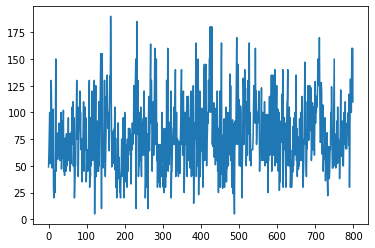

In [42]:
pokemonDF["Attack"].plot()

<AxesSubplot:>

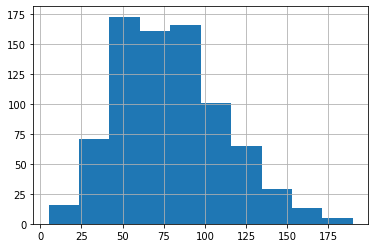

In [43]:
pokemonDF["Attack"].hist()

****
## Selecting out a "random" sample from a dataframe

You may neeed to select a random(means, shuffled) sample from the dataset (referred as Sampling).<br>This practice is followed/adopted during segregating a dataset in terms of train dataset, validation dataset, test dataset.

> if `frac=0.4` => only 40% dataset will firstly be randomly selected/sampled and then shuffling will perform.

> if `frac=1` => complete datset will be shuffled.

In [50]:
pokemonDF.sample(frac=0.4)    # that's why only 320 rows, i.e. 40% of 800 rows, are being worked upon and displayed here. 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
132,133,Scyther,Bug,Flying,70,110,80,55,80,105,1,False
575,576,Simipour,Water,NaN,75,98,63,98,63,101,5,False
668,669,Litwick,Ghost,Fire,50,30,55,65,55,20,5,False
217,218,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Mr. Mime,Psychic,Fairy,40,45,65,100,120,90,1,False
657,658,Galvantula,Bug,Electric,70,77,60,97,60,108,5,False
113,114,Marowak,Ground,NaN,60,80,110,50,80,45,1,False
626,627,Carracosta,Water,Rock,74,108,133,83,65,32,5,False


****
### Combining multiple boolean masks in Pandas

Generally in bit masking, in other areas of computer science, this is done with "and" (if both masks must be True), or "or" (if only one needs to be True).

In [94]:
(cricketDF['Batter Hand'] == "Right") and (cricketDF['Is Keeper'] == 'Y')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Actually, this doesn't work in Pandas because python underneath does not know how to compare two series using 'and' or 'or' operator.

So in Pandas, pipe ( | ) and ampersand ( & ) operators are used to combine multiple boolean-mask operations:

| : OR operation

& : AND operation

**Note:** *wrap individual terms (that are performing boolean-mask operations) inside parenthesis.*

In [105]:
batAndKeep = (cricketDF['Batter Hand'] == "Right") & (cricketDF['Is Keeper'] == 'Y')

# for instance, cricketers who are a keeper as well as a batsman

In [109]:
cricketDF[batAndKeep]

# so there are 99 such cricketers

,Player Id,Player Surname,Player First Name,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
15,31,Healy,Ian,Y,1,Right,Y,1,Right,Pace,Medium,Y,1,Male
101,237,Mashud,Khaled,Y,1,Right,Y,1,Right,Pace,Medium,Y,1,Male
125,287,Boucher,Mark,Y,1,Right,Y,1,Right,Pace,Medium,Y,1,Male
138,306,Dilshan,Tillakaratne,Y,1,Right,Y,1,Right,Spin,Orthodox,Y,1,Male
191,397,Browne,Courtney,Y,1,Right,Y,1,Right,Pace,Medium,Y,1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,3470008,Boyce,Reniece,Y,1,Right,Y,1,Right,Pace,Medium,Y,2,Female
1516,3760011,Klaasen,Henrich,Y,1,Right,Y,1,Right,Pace,Medium,Y,1,Male
1531,3760048,Hope,Shai Diego,Y,1,Right,Y,1,Right,Spin,Orthodox,Y,1,Male
1540,3760076,Das,Liton,Y,1,Right,Y,1,Right,Spin,Orthodox,Y,1,Male


****
### Indexing DataFrames

Both Series and DataFrames, can have indices applied to them. The index is essentially a row level label.

In pandas the rows correspond to axis zero.

Indices can either be autogenerated, such as when creating a new Series without an index, in which case we get numeric values, or they can be set explicitly, like when we use dictionary object to create the Series, or when we load data from CSV file and set appropriate parameters.

Another approach to use **set_index( )** function.<br>This function takes a list of columns and promotes those columns to an index.<br>
The set_index( ) function is a destructive process, and it does not keep the current index.<br>If you want to keep the current index, you need to create a new column and copy into it values from the index attribute.

In [166]:
# firstly, importing pandas and the dataset.
# and, assigning "Player Id" as the indexing column
import pandas as pd
cricketDF = pd.read_csv('./datasets/Cricket-Players.csv', index_col=0)
cricketDF.head()

,Player Surname,Player Other Names,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender
Player Id,,,,,,,,,,,,,
5,Razzaq,Abdul,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
11,Mahmood,Azhar,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male
16,Raza,Hasan,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
17,Ali,Ghulam,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male
18,Ahmad,Ijaz,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male


Let's index the dataframe by "Player Other Names". So preserve the  "Player Id" into new column.<br>
This can be done by using the indexing operator on the string that has the column label.

Then, use set_index( ) to set index of the column to chance of admit.

In [167]:
# copy the indexed data into its own column
cricketDF['Player Id'] = cricketDF.index

# set index index to another column
cricketDF = cricketDF.set_index('Player Other Names')

cricketDF.head()

,Player Surname,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender,Player Id
Player Other Names,,,,,,,,,,,,,
Abdul,Razzaq,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,5
Azhar,Mahmood,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male,11
Hasan,Raza,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,16
Ghulam,Ali,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,17
Ijaz,Ahmad,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,18


Notice above that, the new index created from an existing column bears a name (the original name of the column itself).

In turn, you can get rid of the index completely (and return to original indexing state) by calling fucntion reset_index( ). This promotes the index into a column and creates a default numbered index.

In [168]:
cricketDF = cricketDF.reset_index()
cricketDF.head()

,Player Other Names,Player Surname,Is Batter,Batter Hand Id,Batter Hand,Is Bowler,Bowler Hand Id,Bowler Hand,Pace/Spin,Bowler Style,Is Keeper,Gender Id,Gender,Player Id
0,Abdul,Razzaq,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,5
1,Azhar,Mahmood,Y,1,Right,Y,1,Right,Pace,Fast-Medium,N,1,Male,11
2,Hasan,Raza,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,16
3,Ghulam,Ali,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,17
4,Ijaz,Ahmad,Y,1,Right,Y,1,Right,Pace,Medium,N,1,Male,18


#### Multi-level indexing of DataFrames

Pandas also feature multi-level indexing. This is similar to composite keys in relational database systems.

To create a multi-level index, simply call set_index( ) and pass it a list of columns that are interested for promoting to an index.

In [169]:
cricketDF = cricketDF.set_index(['Batter Hand', 'Bowler Style'])
cricketDF

Player Other Names Player Surname Is Batter  Batter Hand Id Is Bowler  ...  Pace/Spin Is Keeper Gender Id  Gender  Player Id
Batter Hand Bowler Style                                                                        ...                                                  
Right       Medium                    Abdul         Razzaq         Y               1         Y  ...       Pace         N         1    Male          5
            Fast-Medium               Azhar        Mahmood         Y               1         Y  ...       Pace         N         1    Male         11
            Medium                    Hasan           Raza         Y               1         Y  ...       Pace         N         1    Male         16
            Medium                   Ghulam            Ali         Y               1         Y  ...       Pace         N         1    Male         17
            Medium                     Ijaz          Ahmad         Y               1         Y  ...       Pace         N         1    Male         18
...                                     ...            ...       ...             ...       ...  ...        ...       ...       ...     ...        ...
            Medium                    Panna          Ghosh         Y               1         Y  ...       Pace         N         2  Female    4390269
            Medium                  Sobhana        Mostary         Y               1         Y  ...       Pace         N         2  Female    4390270
Left        Medium            Devon Phillip         Conway         Y               2         Y  ...       Pace         N         1    Male    4850002
            Medium                   Brooke       Halliday         Y               2         Y  ...       Pace         N         2  Female    4920001
Right       Orthodox                   Fran          Jonas         Y               1         Y  ...       Spin         N         2  Female    4920006

[1612 rows x 12 columns]

Well now the question arises as to how to query a multi-indeed dataframe?

As the loc attribute o the dataframe can take multiple arguments. And it could query both the row and the columns. So, when using a multi-index we must provide the arguments in order by the level we wsh to query.

Inside of the index, each column is called a level and the outermost column is level zero.

In [177]:
cricketDF.loc['Right', 'Medium']

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Player Other Names Player Surname Is Batter  Batter Hand Id Is Bowler  ...  Pace/Spin Is Keeper Gender Id  Gender  Player Id
Batter Hand Bowler Style                                                                        ...                                                  
Right       Medium                    Abdul         Razzaq         Y               1         Y  ...       Pace         N         1    Male          5
            Medium                    Hasan           Raza         Y               1         Y  ...       Pace         N         1    Male         16
            Medium                   Ghulam            Ali         Y               1         Y  ...       Pace         N         1    Male         17
            Medium                     Ijaz          Ahmad         Y               1         Y  ...       Pace         N         1    Male         18
            Medium                     Greg        Blewett         Y               1         Y  ...       Pace         N         1    Male         20
...                                     ...            ...       ...             ...       ...  ...        ...       ...       ...     ...        ...
            Medium                  Hansima   Karunarathna         Y               1         Y  ...       Pace         N         2  Female    4390058
            Medium                    Richa          Ghosh         Y               1         Y  ...       Pace         N         2  Female    4390131
            Medium                  Jessica           Kerr         Y               1         Y  ...       Pace         N         2  Female    4390259
            Medium                    Panna          Ghosh         Y               1         Y  ...       Pace         N         2  Female    4390269
            Medium                  Sobhana        Mostary         Y               1         Y  ...       Pace         N         2  Female    4390270

[505 rows x 12 columns]

Above result is exactly same as the result that would have been generated when the **un-indexed** "cricketDF" dataframe must have been queried on the condition like :<br>`cricketDF[(cricketDF['Batter Hand']) == 'Right' & (cricketDF['Bowler Style'] == 'Medium')]`

This would too return a 505 x 12 dataframe

In [180]:
# Compare 2 kinds of Bowler Styles - Orthodox & Fast-Medium, typically who are right-handed batsmen.

# In this case, a list of tuples is passed into loc. Each tuple should have 2 elements,
# the first value corresponds to first index and the second element corresponds to second index.
cricketDF.loc[ [('Right', 'Orthodox'), ('Right', 'Fast-Medium')] ]

Player Other Names Player Surname Is Batter  Batter Hand Id Is Bowler  ...  Pace/Spin Is Keeper Gender Id Gender  Player Id
Batter Hand Bowler Style                                                                        ...                                                 
Right       Orthodox                Saqlain        Mushtaq         Y               1         Y  ...       Spin         N         1   Male         56
            Orthodox                  Colin         Miller         Y               1         Y  ...       Spin         N         1   Male         76
            Orthodox                  Ricky        Ponting         Y               1         Y  ...       Spin         N         1   Male         82
            Orthodox                 Ashley          Giles         Y               1         Y  ...       Spin         N         1   Male        125
            Orthodox                Muttiah    Muralidaran         Y               1         Y  ...       Spin         N         1   Male        137
...                                     ...            ...       ...             ...       ...  ...        ...       ...       ...    ...        ...
            Fast-Medium              Naseem           Shah         Y               1         Y  ...       Pace         N         1   Male    4090001
            Fast-Medium                Musa           Khan         Y               1         Y  ...       Pace         N         1   Male    4090003
            Fast-Medium           Kyle Alex       Jamieson         Y               1         Y  ...       Pace         N         1   Male    4090005
            Fast-Medium      Lubabalo Lutho        Sipamla         Y               1         Y  ...       Pace         N         1   Male    4090009
            Fast-Medium         Daryn Niles     Dupavillon         Y               1         Y  ...       Pace         N         1   Male    4090014

[560 rows x 12 columns]

****
### Dealing with Missing Values in DataFrames

Earlier we saw a preview of how Pandas handles missing values using the None type and Numpy NaN values. Missing values are pretty common in data cleaning tasks.

For instance, if you're running a survey and a respondent didn't answer a question, the missing value is actually an omission. This kind of missing data is called **Missing at Random** if there are other variables that might be used to predict the variable which is missing.<br>
Often it's found that, missing data (for eg, interest in being involved in a research study), has some correlation with other data like gender or ethnicity. If there's no relationship to other variables, then we call this data **Missing Completely at Random**.

Pandas is pretty good at detecting missing values directly from underlying data formats like CSV files. Although most missing values are often formatted as NaN, NULL, None, or N/A, sometimes missing values are not labeled so clearly. For example, social scientists often use the value of 99 in binary categories to indicate that it's a missing value.

The Pandas read_csv( ) function has a parameter called na_values that allows us to specify the format of missing values. It allows scalar string lists or dictionaries to be used.

In [226]:
import pandas as pd
# let's create a dummy dataframe, consisting of student's marks in different categories

marks = pd.DataFrame({'Student Name': ['Arman','Akshat','Tanya','Neha','Jason','Vishrut','Rishabh','Prachi','Pradeep','Sakshi'],
                      'Assignment': [57.14,95.05,83.70,float('nan'),91.32,95.00,72.8,84.0,90.14, 92.55],
                      'Tutorial': [34.09,105.49,83.17,float('nan'),93.64,92.62,108.4,float('nan'),93.0,97.5],
                      'Midterm': [64.38,67.50,float('nan'),49.38,95.00,93.12,56.25,60.0,47.5,51.25],
                      'Finals': [52.5,68.33,48.6,80.45,73.89,80.56,73.89,68.06,float('nan'),56.11]
                     })
marks

,Student Name,Assignment,Tutorial,Midterm,Finals
0,Arman,57.14,34.09,64.38,52.50
1,Akshat,95.05,105.49,67.50,68.33
2,Tanya,83.70,83.17,NaN,48.60
3,Neha,NaN,NaN,49.38,80.45
4,Jason,91.32,93.64,95.00,73.89
5,Vishrut,95.00,92.62,93.12,80.56
6,Rishabh,72.80,108.40,56.25,73.89
7,Prachi,84.00,NaN,60.00,68.06
8,Pradeep,90.14,93.00,47.50,NaN
9,Sakshi,92.55,97.50,51.25,56.11


- Use the function .isnull( ) to create a boolean mask of the whole dataframe (places "True" at those places where an NaN is found).<br>This effectively broadcasts the isnull( ) to every cell of data.

In [227]:
marks.isnull()
# notice that indexes #2, #3, etc. shows True because it contains a NaN value.

,Student Name,Assignment,Tutorial,Midterm,Finals
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,True,True,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,True,False,False
8,False,False,False,False,True
9,False,False,False,False,False


- Use .fillna( ) function to fill all the missing values with 0

In [228]:
marks.fillna(0)

,Student Name,Assignment,Tutorial,Midterm,Finals
0,Arman,57.14,34.09,64.38,52.50
1,Akshat,95.05,105.49,67.50,68.33
2,Tanya,83.70,83.17,0.00,48.60
3,Neha,0.00,0.00,49.38,80.45
4,Jason,91.32,93.64,95.00,73.89
5,Vishrut,95.00,92.62,93.12,80.56
6,Rishabh,72.80,108.40,56.25,73.89
7,Prachi,84.00,0.00,60.00,68.06
8,Pradeep,90.14,93.00,47.50,0.00
9,Sakshi,92.55,97.50,51.25,56.11


- Use function .dropna( ) which drops any rows with missing data (ie. has values like NaN, null, etc.)

In [231]:
marks.dropna(inplace=True)

# the attribute, inplace=True , will not return a copy of "marks" dataframe. Instead, it would modifies the value.

marks   # so, indexes #2, #3, #7, #8 are finally dropped

,Student Name,Assignment,Tutorial,Midterm,Finals
0,Arman,57.14,34.09,64.38,52.50
1,Akshat,95.05,105.49,67.50,68.33
4,Jason,91.32,93.64,95.00,73.89
5,Vishrut,95.00,92.62,93.12,80.56
6,Rishabh,72.80,108.40,56.25,73.89
9,Sakshi,92.55,97.50,51.25,56.11


****

## Example: Manipulating DataFrame

In [285]:
import pandas as pd

# loading the US Presidents dataset
presidents = pd.read_csv('./datasets/presidents.csv')

# cleaning up the columns off of whitespaces
cols = presidents.columns
presidents.columns = [x.strip() for x in cols]

presidents.head()

,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State
0,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,30/04/1789,4/03/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia
1,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,4/03/1797,4/03/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts
2,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,4/03/1801,4/03/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia
3,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,4/03/1809,4/03/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia
4,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,4/03/1817,4/03/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia


### Use of .apply( ) function
Let's seperate "President" column into "First Name" and "Last Name".<br>*One of a solution is below...*

In [266]:
# the .apply() function on a dataframe will take some arbitrary function and apply it to either a Series (a single column) or DataFrame across all rows or columns.
# here, let's write a function that splits a string into 2 pieces using a single row of data

def splitname(row):
    # "row" is a single Series object which is a single row indexed by column values
    row['First Name'] = row["President"].split(" ")[0]
    row['Last Name'] = row["President"].split(" ")[-1]
    return row

presidents = presidents.apply(splitname, axis='columns')
presidents.head()

,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State,First Name,Last Name
0,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,30/04/1789,4/03/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,George,Washington
1,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,4/03/1797,4/03/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,John,Adams
2,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,4/03/1801,4/03/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,Thomas,Jefferson
3,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,4/03/1809,4/03/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,James,Madison
4,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,4/03/1817,4/03/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia,James,Monroe


In [267]:
del(presidents['First Name'])
del(presidents['Last Name'])

# deleting First Name and Last Name column

### Use of .extract( ) function

.extract( ) takes a regex as input and specifically requires you to set capture groups that correspond to the output columns a user is interested in.<br>Extract function is built into the str function of the Series object, so it can be called using Series.str.extract(pattern).

For example, to extract firstname and lastname from "Presidents" column; we can write a pattern regex and use it in .extract( )

In [270]:
# this regex has three sets of parenthesis:
# first group : it's a group named as "First". It anchors from beginning to any string. Reads any number of alphanumeric characters and returns it
# second group : it's a look-ahead only. Reads whitespace. Does not return any matched characters.
# third group : it's a group named as "Last". It anchors at the back of any string. Reads any number of characters.
pattern = "(?P<First>^[\w]*)(?:.* )(?P<Last>[\w]*$)"

names = presidents["President"].str.extract(pattern).head()
names

,First,Last
0,George,Washington
1,John,Adams
2,Thomas,Jefferson
3,James,Madison
4,James,Monroe


In [271]:
# and, this can be copied into main dataframe
presidents['First Name'] = names['First']
presidents['Last Name'] = names['Last']
presidents.head()

,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State,First Name,Last Name
0,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,30/04/1789,4/03/1797,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,George,Washington
1,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,4/03/1797,4/03/1801,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,John,Adams
2,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,4/03/1801,4/03/1809,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,Thomas,Jefferson
3,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,4/03/1809,4/03/1817,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,James,Madison
4,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,4/03/1817,4/03/1825,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia,James,Monroe


#### Use of .to_datetime( ) function

This function cleans up the datetime format. For example,

In [303]:
presidents["Took office"] = pd.to_datetime(presidents["Took office"])

presidents[["President", "Took office"]].head()

,President,Took office
0,George Washington,1789-04-30
1,John Adams,1797-04-03
2,Thomas Jefferson,1801-04-03
3,James Madison,1809-04-03
4,James Monroe,1817-04-03


****
# Merging DataFrames

Multiple dataframes can also be merged horizontally or concatenated vertically.

Let's explain some concepts about Venn Diagrams.

A Venn diagram is traditionally used to show set membership. For example, the circle on the left is the **population of students** at a University, the circle on the right is the **population of staff** at a University, and the overlapping region in the middle are all of those students who are also staff. There is also an overlap between these two populations.

When it comes to translating this to Pandas, we can think of the case where we might have these two populations as indices in separate DataFrames (maybe with the label of person name). When we want to join the DataFrames together, we have some choices to make. First, what do we want a list of all the people regardless of whether they're staff or student, and all of the information we can get on them? In database terminology, this is called a **Full Outer join**. In set theory, it's called a **Union**. In the Venn diagram, it represents everyone in any circle.<br>See below image for understanding...

#### Full Outer Join ie. Union
![Full Outer Join ie. Union](./datasets/images/union.jpg)

If we want only those people who are both staff and students - (perhaps being a staff member and the student involves getting a tuition waiver and we want to calculate the cost of this). In database terminology, this is called an **Inner join**, or in set theory, the **Intersection**. It's represented in the Venn diagram as an overlapping part in each circle.

#### Inner Join ie. Intersection
![Inner Join ie. Intersection](datasets/images/intersection.jpg)


****
Let's create dataframes to understand this. Here, we'll create dataframes of staffs and students to understand about Union, Intersection, Add and Subtract operations.

In [339]:
import pandas as pd

staff_df = pd.DataFrame([{'Name': 'Anurag Singh', 'Role': 'Director of HR'},
                         {'Name': 'Mamta Chaddha', 'Role': 'Proctur'},
                         {'Name': 'Kelvin Mathur', 'Role': 'Grader'}])

staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'Kiara Seth', 'School': 'Arts'},
                         {'Name': 'Anurag Singh', 'School': 'Law'},
                         {'Name': 'Kelvin Mathur', 'School': 'Engineering'}])

student_df = student_df.set_index('Name')

print(staff_df)
print(student_df)

                         Role
Name                         
Anurag Singh   Director of HR
Mamta Chaddha         Proctur
Kelvin Mathur          Grader
                    School
Name                      
Kiara Seth            Arts
Anurag Singh           Law
Kelvin Mathur  Engineering


Hence notice here, there is an overlap in these dataframes - Kelvin & Anurag are staffs as well as students. Importantly, both dataframes are indexed along the 'Name' column

## Use of .merge( ) function
_(by default, "how" parameter is set to "inner", meaning for the inner join.)_

##### METHOD-1 (using indices)

**Union - full outer join**

In [328]:
pd.merge(staff_df, student_df, how="outer", left_index=True, right_index=True)

,Role,School
Name,,
Anurag Singh,Director of HR,Law
Kelvin Mathur,Grader,Engineering
Kiara Seth,NaN,Arts
Mamta Chaddha,Proctur,NaN


***
**Intersection - inner join**

In [329]:
pd.merge(staff_df, student_df, how="inner", left_index=True, right_index=True)

,Role,School
Name,,
Anurag Singh,Director of HR,Law
Kelvin Mathur,Grader,Engineering


***
Now there are 2 other common use cases when merging dataframes and both are examples of **set addition**.

**Left join** - list of all staff regardless whether they were students or not. But, if they were students we would also populate their student details as well.

In [330]:
pd.merge(staff_df, student_df, how="left", left_index=True, right_index=True)

,Role,School
Name,,
Anurag Singh,Director of HR,Law
Mamta Chaddha,Proctur,NaN
Kelvin Mathur,Grader,Engineering


***
**Right join** - list of all students regardless whether they were students or not. But, if they were staff we would also populate their staff details as well.

In [333]:
pd.merge(staff_df, student_df, how="right", left_index=True, right_index=True)

,Role,School
Name,,
Kiara Seth,NaN,Arts
Anurag Singh,Director of HR,Law
Kelvin Mathur,Grader,Engineering


#### METHOD-2 (using "on" parameter)

Another way of joining dataframes is by using columns and not the indices. Here there is a parameter called "on", which is assigned with a column that both the dataframe have as the joining column.

In [340]:
# just resetting the indices of both dataframes.
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

# right-join using "on" parameter
pd.merge(staff_df, student_df, how="right", on="Name")

,Name,Role,School
0,Kiara Seth,NaN,Arts
1,Anurag Singh,Director of HR,Law
2,Kelvin Mathur,Grader,Engineering


****
#### Conflicts during merging of DataFrames

In [347]:
staff_df = pd.DataFrame([{"Name": "Rishi", "Role": "Associate Manager", "Location": "Jhandewala 19B"},
                         {"Name": "Deepak", "Role": "Director of HR", "Location": "Mayur Vihar estate"},
                         {"Name": "Harshit", "Role": "Students Dean", "Location": "Dwarka sector 2"}
                        ])

student_df = pd.DataFrame([{'Name': 'Deepak', 'School': 'Business', 'Location': '13H sector 9 Simla'},
                           {'Name': 'Anurag', 'School': 'Law', 'Location': 'Jhandewala'},
                           {'Name': 'Rishi', 'School': 'Engineering', 'Location': 'Nehru Palace'}])

# Seek out the staff info regardless of whether they were students or not.
# But if they are students, seek out their student details as well. So, we can do a left join on the column Name.
pd.merge(staff_df, student_df, how="left", on="Name")

# here, Location_x and Location_y refers to Location cloumn in left and right dataframes, respectively.


,Name,Role,Location_x,School,Location_y
0,Rishi,Associate Manager,Jhandewala 19B,Engineering,Nehru Palace
1,Deepak,Director of HR,Mayur Vihar estate,Business,13H sector 9 Simla
2,Harshit,Students Dean,Dwarka sector 2,NaN,NaN


****
#### Multi-indexing and multiple columns

It's quite possible that the first name for students and staff might overlap, but the last name might not. In this case, we use a list of multiple columns that should be used to join keys from both dataframes on the on parameter. Note that, column name(s) assigned to the "on" parameter needs to exist in both dataframes.

In [4]:
staff_df = pd.DataFrame([{"First Name": "Rishi", "Last Name": "Mehrotra", "Role": "Associate Manager"},
                         {"First Name": "Harshit", "Last Name": "Kulkarni", "Role": "Course Instructor"},
                         {"First Name": "Simran", "Last Name": "Arora", "Role": "Grader"}
                        ])

student_df = pd.DataFrame([{"First Name": "Harshit", "Last Name": "Singh", "School": "Business"},
                           {"First Name": "Rajat", "Last Name": "Agarwal", "School": "Arts"},
                           {"First Name": "Simran", "Last Name": "Arora", "School": "Engineering"}])

pd.merge(staff_df, student_df, how="inner", on=["First Name", "Last Name"])

# Here, Harshit Kulkarni and Harshit Singh don't match on both keys since thet have different last names.
# So we would expect that an inner join does not include these individuals in the output, and only Simran Arora will be retained.


,First Name,Last Name,Role,School
0,Simran,Arora,Grader,Engineering


***
Joining dataframes through merging is incredibly common; needing to know how to pull data from different sources, clean it, and join it for analysis is an important skill. This is staple not only for pandas, but of database technologies as well.
***

**Note :**
> *If we think of merging as joining "horizontally", meaning we join on similar values in a column found in two dataframes.<br>On other hand, concatenating is joing "vertically", meaning we put dataframes in top or at the bottom of each other.<br><br>
As an example, you have a dataset that tracks some information over the years. And each year's record is maintained as a seperate CSV and every CSV for every year's record has the exactly same columns. If you want to put all the data from all years' record together, it can be concatenated.*
****

<b>A simple demo about .concat( ) function</b>

Source : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Let's concatenate the *staff_df* and *students_df* dataframes. By defult, concatenation is always an "outer" join.  If you're concatenating 2 dataframes that do not have identical columns, and choose the outer method, some cells will be NaN. If you choose to do inner, then some observations will be dropped due to NaN values. It can be thought as analogous to the left and right joins of the merge( ) function.

In [6]:
frames = [staff_df, student_df]
pd.concat(frames, keys=["staff", "students"])     # by default, this one is "outer" join

First Name Last Name               Role       School
staff    0      Rishi  Mehrotra  Associate Manager          NaN
         1    Harshit  Kulkarni  Course Instructor          NaN
         2     Simran     Arora             Grader          NaN
students 0    Harshit     Singh                NaN     Business
         1      Rajat   Agarwal                NaN         Arts
         2     Simran     Arora                NaN  Engineering

In [7]:
pd.concat(frames, join="inner", keys=["staff", "students"])    # "inner" join

First Name Last Name
staff    0      Rishi  Mehrotra
         1    Harshit  Kulkarni
         2     Simran     Arora
students 0    Harshit     Singh
         1      Rajat   Agarwal
         2     Simran     Arora

****

# Making the code 'PANDORABLE'

Python programmers often suggest that there are many ways the language can be used to solve a particular problem; but some are more appropriate than others. The best solutions are celebrated as idiomatic Python.

A sort of sub-language within Python, Pandas has its own set of idioms - such as, using vectorization wherever possible and not using iterative loops if not needed. Several developers and users within the Pandas community have used the term **pandorable** for these idioms.<br>Well, here we'll see how to make your code pandorable.

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/census.csv')       # US census' data. It's a large dataset with numerous columns.
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


### Method Chaining

The general idea behind method chaining is that every method on an object returns a reference to that object. The advantage of it is that...many different operations on a dataframe can be condensed together into one line/statement of code.

For example, we will take above dataset and try to do method chaining to make it look pandorable.

**I. PANDORABLE method :**

In [14]:
(df.where(df['SUMLEV'] == 50)
 .dropna()
 .set_index(['STNAME', 'CTYNAME'])
 .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

# Let's walthrough this chaining example....
# Firstly, we use the where() function on the dataframe and pass in a boolean mask which is only true for those rows where the SUMLEV == 50.
# This indicates in our source data that the data is summarized at the county level.
# On the result of the where() function, we evaluate the dropna to drop the missing values.
# Remember that .where() doesn't drop missing values by default.
# Then we set an index on the result of that. In this case I've set it to the state name followed by the county name.
# Finally, renaming a column to make it more readable.

# Note that instead of writing this on a single line, I began the
# statement with a parenthesis, which tells python I'm going to span the statement over multiple lines for readability.

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

**II. TRADITIONAL method :**

Here's a non-pandorable way of writing code.

In [15]:
df = df[df['SUMLEV'] == 50]     # use the overlaod indexing operator [] which drops NaN values

df.set_index(['STNAME', 'CTYNAME'], inplace=True)    # setting the new index for df

df.rename(columns = {'ESTIMATESBASE2020': 'Estimates Base 2010'})   # renaming a column name

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Barbour County             27457              27457            27341   
        Bibb County                22915              22919            22861   
        Blount County              57322              57322            57373   
...                                  ...                ...              ...   
Wyoming Sweetwater County          43806              43806            43593   
        Teton County               21294              21294            21297   
        Uinta County               21118              21118            21102   
        Washakie County             8533               8533             8545   
        Weston County               7208               7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
        Blount County                57711            57776  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County

## When an Idiom (or, "Pandorable" code) is helpful ?

#### Lets understand this with an example :

Now, the significance of any good idiom is to understand whether it is helpful or not. To understand this, you can actually time both methods (Pandorable and Traditional method) and see which one runs faster.

We can put the approach into a function and pass the function into the timeit function to count the time the parameter number allows us to choose how many times we want to run the function. Here we will just set it to 10.

In [16]:
# hence, bringing the timing functionality from the timeit module.

import timeit

**I. our 1st approach.**

In [24]:
def first_approach():
    global df
    return (df.where(df['SUMLEV']==50)
             .dropna()
             .set_index(['STNAME','CTYNAME'])
             .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

# Read in our dataset
df = pd.read_csv('datasets/census.csv')

# And now lets run it
timeit.timeit(first_approach, number=10)

0.29698424800881185

**II. our 2nd approach.**

In [29]:
def second_approach():
    global df
    new_df = df[df['SUMLEV']==50]
    new_df.set_index(['STNAME','CTYNAME'], inplace=True)
    return new_df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

# Read in our dataset anew
df = pd.read_csv('datasets/census.csv')

# And now lets run it
timeit.timeit(second_approach, number=10)

0.051387972984230146

Clearly, the **2nd approach is much faster!**
So, this is a particular example of a classic time readability trade off.

Noticeably, keep in mind that idioms may have performance issues despite being stylistic - so one must consider this as well during data cleaning or analysis exercise.

****

Python has a function called map, which is sort of a basis for functional programming in the language. When you want to use map in Python, you pass it some function you want called, and some iterable, like a list, that you want the function to be applied to. The results of that function are then called against each item in the list and there's a resulting list of all of the evaluations of that function.<br>
Some sources for map( ), refer here :
- https://docs.python.org/3/library/functions.html#map
- https://realpython.com/python-map-function/


Pandas has something similar, which is called **applymap( )**.<br>
In applymap, you provide some function which should operate on each cell of a dataframe and the return set is itself a dataframe.

****

#### Lets look at an another pandas idiom -

Let's take a look at the census DataFrame.<br>In this DataFrame, we have five columns for population estimates, with each column corresponding with one year of estimates.
<br><br>
For example, to create some new columns for minimum or maximum values, the apply( ) function would be helpful.

First, we need to write a function which takes in a particular row of data, finds a minimum and maximum values, and returns a new row of data from that - can call this function min_max( ), this is pretty straight forward.<br>We can create some small slice of a row by projecting the population columns. Then use the NumPy min( ) and max( ) functions, and create a new series with a label values representing the new values that we want to apply.

In [38]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

df.apply(min_max, axis="columns")

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
...,...,...
3188,43593,45162
3189,21297,23125
3190,20822,21102
3191,8316,8545


Well, instead of returning a seperate series to display the min and max, those 2 new columns can also be added in the original dataframe to store min and max values.<br>This can be achieved as shown below...

In [39]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)    # Create a new column-entry for max
    row['min'] = np.min(data)    # Create a new column-entry for min
    return row

df.apply(min_max, axis="columns")

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,43593
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,21297
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,20822
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8316


apply( ) is an extremely important tool in Pandas toolkit.
Typically, apply( ) can be seen being used with **lambda** functions.

Above example can be reinstated with help of lambdas as :

*A **lambda** is just an unnamed function in Python.<br>In this case it takes a single parameter, x, and returns a single value i.e. the maximum over all columns associated with row x.*

In [41]:
rows = ['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013','POPESTIMATE2014', 'POPESTIMATE2015']
# Now we'll just apply this across the dataframe with a lambda
df.apply(lambda x: np.max(x[rows]), axis=1).head()

0    4858979
1      55347
2     203709
3      27341
4      22861
dtype: int64

The beauty of the apply( ) function is that it allows flexibility in doing whatever manipulation that you desire as, the function you pass into apply can be any customized however when needed.

#### Example :
As an example, let's say we want to divide the states into 4 categories:<br>•Northeast  •Midwest  •South  •West.<br>
To do this, firstly we can write a customized function i.e. get_state_region( ) that returns the region based on the state.

In [46]:
def get_state_region(x):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                 'Rhode Island','Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa',
               'Kansas','Minnesota','Missouri','Nebraska','North Dakota',
               'South Dakota']
    south = ['Delaware','Florida','Georgia','Maryland','North Carolina',
             'South Carolina','Virginia','District of Columbia','West Virginia',
             'Alabama','Kentucky','Mississippi','Tennessee','Arkansas',
             'Louisiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah',
            'Wyoming','Alaska','California','Hawaii','Oregon','Washington']
    
    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"

Now, create a new column called Region - which shows the state's region.<br>It can be done by using the apply( ) function over get_state_region customised function.<br>
(The customized function
will work on the state name column STNAME. So we will set the apply function on the state name column and pass the customized function into the apply function)

In [47]:
df['state_region'] = df['STNAME'].apply(lambda x: get_state_region(x))
# "state_region" is a new column.

df[['STNAME','state_region']].head()

,STNAME,state_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


****

# Splitting

Sometimes we want to select data based on groups and understand aggregated data on a group level. We have seen that even though Pandas allows us to iterate over every row in a dataframe, it is generally very slow to do so. Fortunately, Pandas has a **groupby( ) function** to speed up such task. The idea behind the groupby( ) function is that it takes some dataframe, splits it into chunks based on some key values, applies computation on those chunks, then combines the results back together into another dataframe. In pandas this is refered to as **the split-apply-combine pattern**.<br>
_Here are few examples of how splitting works to process data._

_Consider US's census data..._

**Example 1:**

In [48]:
import pandas as pd
import numpy as np

# reading the US's census data
df = pd.read_csv('datasets/census.csv')

# including the state level summarizations, which have Sum Level == 50
df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


Let's get a list of the unique states, and then iterate over all the states and for each state we shall reduce the data frame and calculate the average.

This task will be run for 3 times.<br>To do this, use the cell magic function %%timeit and jupyter notebook will display the avarage value.

**I. 1st Approach**

In [50]:
%%timeit -n 3

for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])    # calculate the average using numpy for this particular state
    print('Counties in state ' + state + ' have an average population of ' + str(avg))      # print it to the screen
    

    
# scroll down at the bottom of output to see that takes it a fair bit of time to finish.

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964

Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an avera

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania hav

Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alab

Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average populat

**II. 2nd Approach - using groupby( ) function**

In [51]:
%%timeit -n 3
# For this approach, we start by telling pandas we're interested in grouping by state name, this is the "split"
for group, frame in df.groupby('STNAME'):
    # Notice that, there are 2 values set here. groupby() returns a tuple, where the first value is the
    # value of the key we were trying to group by, in this case a specific state name, and the second one is
    # projected dataframe that was found for that group
    
    # Now we include our logic in the "apply" step, which is to calculate an average of the census2010pop
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + 
          ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Well just notice the huge difference in speed!!!<br>Approach-2 is almost 2 times faster than approach-1.

groupby( ) also accepts functions to segement the data instead of one or more columns.<br>
Source : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

****

*Lets consider an another example*....<br>**Example 2 :**

Consider there's a big batch job with lots of processing and you want to work on only a third or so of the states at a given time.<br>We could create some function which returns a number between 0 and 2 based on the first character of the state name. Then we can tell groupby to use this function to split up our data frame.<br>It's important to note that in order to do this you need to set the index of the data frame to be the column that you want to groupby first.

We'll create some new function called set_batch_number( ) and if the first letter of the parameter is a capital "M" we'll return a 0. If it's a capital "Q" we'll return a 1 and otherwise we'll return a 2. Then we'll pass this function to the data frame.

In [52]:
df = df.set_index('STNAME')

def set_batch_number(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

# The dataframe is supposed to be grouped by according to the batch number. And each batch group can be looped through.
for group, frame in df.groupby(set_batch_number):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


Notice that this time a column name is not passed to the groupby( ).<br>Instead, we have set the index of the dataframe to be STNAME, and if no column identifier is passed, the groupby( ) will automatically use the index.
*****

**Example 3 :**

There is a dataset of housing, from Airbnb.<br>In this dataset there are two columns of interest, one is the cancellation_policy and the other is the review_scores_value.

***Question is - how to groupby these 2 columns ?***

In [54]:
df = pd.read_csv("./datasets/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


**1st Approach :** to promote these 2 columns to a multiindex and just call groupby( )<br>
When we have a multiindex we need to pass in the levels we are interested in grouping by.<br>
By default, groupby( ) does not preassume to groupby on which levels.

In [55]:
df = df.set_index(["cancellation_policy", "review_scores_value"])

for group, frame in df.groupby(level=(0,1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


Now, what if we wanted to group by the cancelation policy and review scores, but separate out all the 10's from those under 10? In this case, we could use a function to manage the groupings.

In [56]:
def grouping_fun(item):
    # Check the "review_scores_value" portion of the index. item is in the format of (cancellation_policy, review_scores_value) i.e. a tuple
    if item[1] == 10.0:
        return (item[0], "10.0")
    else:
        return (item[0], "not 10.0")

for group, frame in df.groupby(by=grouping_fun):
    print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


****

There are 3 broad categories of data processing to happen during the apply step:

• Aggregation of group data

• Transformation of group data

• Filtration of group data

## Aggregation

The most straight forward apply step is the aggregation of data, and uses the method agg( ) on the groupby object. Thus far we have only iterated through the groupby object, unpacking it into a label (the group name) and a dataframe. But with agg( ) we can pass in a dictionary of the columns we are interested in aggregating along with the function we are looking to apply to aggregate.

**Example :** Let's groupby the cancellation_policy and find the average review_scores_value by group

In [57]:
df = df.reset_index()

df.groupby("cancellation_policy").agg({"review_scores_value": np.average})

# This does not seem to work i.e. displays up NaNs. The issue is actually in the function that we sent to aggregate.
# np.average does not ignore NaNs.

,review_scores_value
cancellation_policy,
flexible,NaN
moderate,NaN
strict,NaN
super_strict_30,NaN


So, it's better to use np.nanmean

In [59]:
df.groupby("cancellation_policy").agg({"review_scores_value": np.nanmean})

,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


Also, we can extend this dictionary to aggregate by multiple functins or multiple columns.

In [60]:
df.groupby("cancellation_policy").agg({"review_scores_value": (np.nanmean,np.nanstd),
                                      "reviews_per_month": np.nanmean})

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

*Let's do a walkthrough of above cell...*<br>
First we're doing a groupby on the dataframe object by the column "cancellation_policy". This creates a new GroupBy object. Then we are invoking the agg( ) function on that object. The agg function is going to apply one or more functions we specify to the group dataframes and return a single row per dataframe/group. When we called this function we sent it two dictionary entries, each with the key indicating which column we wanted functions applied to. For the first column we actually supplied a tuple of two functions.<br> Note that these are not function invocations, like np.nanmean(), or function names, like "nanmean". They are references to functions which will return single values.

The groupby object will recognize the tuple and call each function in order on the same column. The results will be in a heirarchical index, but since they are columns they don't show as an index per se. Then we indicated another column and a single function we wanted to run.

*****

## Transformation

Transformation is different from aggregation.<br>Where agg( ) returns a single value per column, so one row per group, tranform( ) returns an object that is the same size as the group.

Essentially, it broadcasts the function you supply over the grouped dataframe, returning a new dataframe. This makes combining data later easy.

**Example :** To include the average rating values in a given group by cancellation policy, but preserve the dataframe shape so that we could generate a difference between an individual observation and the sum.

In [61]:
cols = ['cancellation_policy','review_scores_value']

# now transform it
transform_df = df[cols].groupby('cancellation_policy').transform(np.nanmean)
transform_df.head()

,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


In [62]:
# So we can see that the index here is actually the same as the original dataframe.
# but let's just rename the column in the transformed version before joining them.

transform_df.rename({'review_scores_value': 'mean_review_scores'}, axis='columns', inplace=True)

# now, joining them across same indices because indexes for both dataframes are the same.
df = df.merge(transform_df, left_index=True, right_index=True)
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,9.0,f,NaN,NaN,f,t,f,1,0.47,9.307398
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,10.0,f,NaN,NaN,f,f,f,1,1.00,9.307398
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,9.0,f,NaN,NaN,f,f,f,1,2.25,9.237421


Now, the new column (mean_review_scores) is in place.

Lets calculate the difference between a given row and it's group (the cancellation policy).

In [64]:
df['mean_diff'] = np.absolute(df['review_scores_value'] - df['mean_review_scores'])
df['mean_diff'].head()

0         NaN
1    0.307398
2    0.692602
3    0.692602
4    0.762579
Name: mean_diff, dtype: float64

*****
## Filtering

The GroupBy object has build in support for filtering groups as well. It's often that you'll want to group by some feature, then make some transformation to the groups, then drop certain groups as part of your cleaning routines.

The filter( ) function takes in a function which it applies to each group dataframe and returns either a True or a False, depending upon whether that group should be included in the results.

**Example :** The groups which have a mean rating above 9.2 included in our results.

In [67]:
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value']) > 9.2)


# Note that, the results are still indexed, but that any of the results which were in a group with a mean
# review score of less than or equal to 9.2 were not copied over.

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,f,NaN,NaN,f,t,f,1,0.47,9.307398,0.692602
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,f,NaN,NaN,f,f,f,1,1.00,9.307398,0.692602
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,f,NaN,NaN,f,f,f,1,2.25,9.237421,0.762579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,flexible,NaN,14689681,https://www.airbnb.com/rooms/14689681,20160906204935,2016-09-07,Beautiful loft style bedroom with large bathroom,You'd be living on the top floor of a four sto...,NaN,You'd be living on the top floor of a four sto...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3577,flexible,NaN,13750763,https://www.airbnb.com/rooms/13750763,20160906204935,2016-09-07,Comfortable Space in the Heart of Brookline,"Our place is close to Coolidge Corner, Allston...",This space consists of 2 Rooms and a private b...,"Our place is close to Coolidge Corner, Allston...",...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3579,flexible,NaN,14852179,https://www.airbnb.com/rooms/14852179,20160906204935,2016-09-07,Spacious Queen Bed Room Close to Boston Univer...,- Grocery: A full-size Star market is 2 minute...,NaN,- Grocery: A full-size Star market is 2 minute...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3582,flexible,NaN,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN


 ****
 
## Applying

By far the most common operation invoked on groupby objects is the apply( ) function.

apply( ) allows to apply an arbitrary function to each group, and stitch the results back for each apply( ) into a single dataframe where the index is preserved.

**Example :** 

In [68]:
df = pd.read_csv("datasets/listings.csv")      # loading the airbnb dataset

# let's consider some columns, such as : 
df = df[['cancellation_policy','review_scores_value']]
df.head()

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


Previously, we found the average review score of a listing and its deviation from the group mean. This was a 2 step process. First, the transform( ) was used on the groupby object and then broadcast it to create a new column.

With apply( ) this whole logic can be wrapped in a single go.

In [69]:
def calc_mean_review_scores(group):
    # group is a dataframe just of whatever we have grouped by, e.g. cancellation_policy, so we can treat
    # this as the complete dataframe
    avg = np.nanmean(group["review_scores_value"])
    
    # now broadcast our formula and create a new column
    group["review_scores_mean"] = np.abs(avg - group["review_scores_value"])
    return group

# Now just apply this to the groups
df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

,cancellation_policy,review_scores_value,review_scores_mean
0,moderate,NaN,NaN
1,moderate,9.0,0.307398
2,moderate,10.0,0.692602
3,moderate,10.0,0.692602
4,flexible,10.0,0.762579


Using apply can be slower than using some of the specialized functions, especially agg( ). But, if your dataframes are not huge, it's a solid general purpose approach.

Groupby is a powerful and commonly used tool for data cleaning and data analysis.<br>Once you have grouped the data by some category you have a dataframe of just those values and you can conduct aggregated analsyis on the segments that you are interested. The groupby( ) function follows a split-apply-combine approach - first the data is split into subgroups, then you can apply some transformation, filtering, or aggregation, then the results are combined automatically by pandas for us.

****


# Scales in Pandas

Let's talk about scales and datatypes. Pandas supports a number of different computational data types such as strings, integers, floating point numbers - but it does not capture the "scale of data

_Consider an example...._

**Example :** Let's say that we have got a DataFrame of students and their academic levels such as being in grade 1, grade 2, and grade 3. <br>_Is the difference between a student in grade 1 and a student in grade 2 the same as the difference between a student in grade 8 and one in grade 9 ?_<br><br>Let's consider final exam scores these students might get on assignments.<br>_Is the difference between an A and an A- the same as the difference between an A- and a B+ ?_<br>At least, the answer is often no, when you're converting this to a percentage-based scale.

Such examples depict some difference in scales.<br>As a data scientist, there's at least four different scales that's worth knowing about.

1. **Ratio scale :**
    + Measurement units are equally spaced.
    + Mathematical operations such as +, -, / and * are valid.
    + valid examples can be like: height, wight, etc.

2. **Interval scale :**
    + Like **ratio scale**, measurement units are equally spaced.
    + There is no clear absence of value i.e. no true zero.<br>So, operations like * and / are not valid.
    + valid example can be like: the temperature as measured in ˚C or ˚F since there's never an absence of temperature, and 0˚ (zero degrees) is actually a meaningful value itself.
    + The direction on a compass can be another good example, where 0˚ on the compass doesn't indicate a lack of direction, but instead describes a direction itself.

> For most of the work in data mining, the differences between the ratio and interval scales might not be clearly apparent or important to the algorithm, but it's important to have this distinction clear in mind when applying advanced statistical tests.

3. **Ordinal scale :**
    + the order of the units is important, but differences between the values are not evenly spaced.
    + valid example can be : A+, A are good example.
    > Ordinal data is very common in machine learning and sometimes can be a bit of a challenge to work with.

4. **Nominal scale :**
    + just called, **Categorical Data**
    + good example : names of teams in a sport.<br>There are a limited number of teams, but changing their order or applying mathematical functions to them is meaningless.
    > Categorical values are very common and we generally refer to categories where there are only two possible values as binary categories.


Scales are important concept in statistics and machine learning.<br>Pandas offer numerous interesting functions to deal with converting between measurement scales.
*****

### Example :

In [2]:
import pandas as pd

# Here’s an example.
# Lets create a dataframe of letter grades in descending order. We can also set an index
# value and here we'll just make it some human judgement of how good a student was, like "excellent" or "good"

df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 
                       'ok', 'ok', 'ok', 'poor', 'poor'],
               columns=["Grades"])
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [3]:
# datatype of this column is just an object as there are string values present in it.

df.dtypes

Grades    object
dtype: object

To change the type to category, use astype( ) function.

In [4]:
df['Grades'].astype("category")

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

Notice above output that there are eleven categories, and pandas is aware of what those categories are.

More interesting though is that our data isn't just categorical, but that it's ordered i.e. an A- comes after a B+, and B comes before a B+.<br>We can tell pandas that the data is ordered by first creating a new categorical data type with the list of the categories (in order) and the ordered=True flag

then, pass this to the astype( ) function

In [7]:
my_categories = pd.CategoricalDtype(categories = ['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                                    ordered=True)

grades = df["Grades"].astype(my_categories)

grades

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

Now we see that pandas is not only aware that there are 11 categories, but it is also aware of the order of those categoreies.

Well, because there is an ordering this can help with comparisons and boolean masking. For example, if we have a list of our grades and we compare them to a “C” we see that the lexicographical comparison returns unintended results.

In [8]:
df[df["Grades"] > "C"]

,Grades
ok,C+
ok,C-
poor,D+
poor,D


So, a C+ is greater than a C, but a C- and D certainly are not.

If we broadcast over the dataframe which has the type set to an ordered categorical, i.e.

In [11]:
grades[grades > "C"]

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

Sometimes it is useful to represent categorical values as each being a column with a true or a false as to whether the category applies. This is especially common in feature extraction, which is a concept in data mining.<br>Variables with a boolean value are typically called dummy variables, and pandas has a built in function called get_dummies( ) which will convert the values of a single column into multiple columns of 0s and 1s indicating the presence of the dummy variable.
****

There’s one more common scale-based operation on converting a scale from something that is on the interval or ratio scale, like a numeric grade, into one which is categorical. Now, this might seem a bit counter intuitive, as you may losing information about the value. But it’s commonly done in a couple of places. For example, when visualizing the frequencies of categories, this can be an extremely useful approach, and histograms are regularly used with converted interval or ratio data.

In addition, when using a machine learning classification approach on data, you need to be using categorical data, so reducing dimensionality may be useful just to apply a given technique.

Pandas has a function called cut which takes as an argument some array-like structure like a column of a dataframe or a series. It also takes a number of bins to be used, and all bins are kept at equal spacing.

**Example :** As previusly, we could group by state then aggregate to get a list of the average county size by state. If we further apply cut to this with, for eg., 10 bins, we can see the states listed as categoricals using the average county size.

In [15]:
import numpy as np
df = pd.read_csv("datasets/census.csv")

# reduce this to county-level data
df = df[df['SUMLEV'] == 50]

# And for a few groups
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.average)

df.head()

STNAME
Alabama        71339.343284
Alaska         24490.724138
Arizona       426134.466667
Arkansas       38878.906667
California    642309.586207
Name: CENSUS2010POP, dtype: float64

Now, let's make a "bins" of each of these - so, use cut( ) function.

In [16]:
pd.cut(df, 10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

So notice that, the states like Alabama and Alaska fall into the same category, while California and the disctrict of Columbia fall in a very different category.

Cutting is just one way to build categories from data, and there are many other methods.<br>For example, cut gives interval data, where the spacing between each category is equal sized. But sometimes, to form categories based on frequency – one may want the number of items in each bin to be the same, instead of the spacing between bins. So, It really depends on what the shape of data is, and what's planned to do.

*****

# Pivot Table in Pandas

A pivot table is a way of summarizing data in a DataFrame for a particular purpose. It makes heavy use of the aggregation function - agg( ).

A pivot table is in itself a DataFrame, where the rows represent 1 variable that you're interested in, the columns another, and then the cells some aggregate value. A pivot table also tends to include marginal values as well, which are sum for each column and row.<br>This allows to  see the relationship between two variables at just a glance.

**Example :**<br>Let's undertsnad this concept with a dataset of the Times Higher Education World University Ranking, which is one of the most influential university measures.

_Let's say we want to create a new column called "Rank_Level", where institutions with world ranking 1-100 are categorized as 1st tier and those with world ranking 101 - 200 are 2nd tier, ranking 201 - 300 are 3rd tier, after 301 are other top universities._

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/cwurData.csv')
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [19]:
def create_category(ranking):
    if (ranking >= 1) & (ranking <= 100):
        return "First Tier Top Unversity"
    elif (ranking >= 101) & (ranking <= 200):
        return "Second Tier Top Unversity"
    elif (ranking >= 201) & (ranking <= 300):
        return "Third Tier Top Unversity"
    return "Other Top Unversity"

# Now, apply this to a single column of data to create a new series
df['Rank_Level'] = df['world_rank'].apply(lambda x: create_category(x))

df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Rank_Level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top Unversity
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top Unversity
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top Unversity
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top Unversity
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top Unversity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015,Other Top Unversity
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015,Other Top Unversity
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015,Other Top Unversity
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015,Other Top Unversity


___A pivot table allows to pivot out one of these columns into a new column headers and compare it against another column as row indices.___

**Example :** Let's say we want to compare rank level versus country of the universities and we want to compare in terms of overall score ?

To do this, we tell Pandas we want the values to be Score, and index to be the country and the columns to be the rank levels. Then we specify that the aggregation function, like the NumPy mean to get the average rating for universities in that country.

In [21]:
df.pivot_table(values='score', index='country', columns='Rank_Level', aggfunc=[np.mean, np.max])



mean                      \
Rank_Level           First Tier Top Unversity Other Top Unversity   
country                                                             
Argentina                                 NaN           44.672857   
Australia                           47.942500           44.645750   
Austria                                   NaN           44.864286   
Belgium                             51.875000           45.081000   
Brazil                                    NaN           44.499706   
Bulgaria                                  NaN           44.335000   
Canada                              53.633846           44.760541   
Chile                                     NaN           44.767500   
China                               53.592500           44.564267   
Colombia                                  NaN           44.432500   
Croatia                                   NaN           44.770000   
Cyprus                                    NaN           44.210000   
Czech Republic                            NaN           44.587778   
Denmark                             49.180000           45.177500   
Egypt                                     NaN           44.230000   
Estonia                                   NaN           44.810000   
Finland                             44.415000           45.062500   
France                              51.914444           44.609028   
Germany                             49.153636           44.978305   
Greece                                    NaN           44.854286   
Hong Kong                                 NaN           45.284286   
Hungary                                   NaN           44.603333   
Iceland                                   NaN           44.980000   
India                                     NaN           44.713226   
Iran                                      NaN           44.270000   
Ireland                                   NaN           44.542500   
Israel                              56.307143           45.013333   
Italy                               48.736667           44.964177   
Japan                               58.812692           44.641583   
Lebanon                                   NaN           44.655000   
Lithuania                                 NaN           44.355000   
Malaysia                                  NaN           45.008333   
Mexico                                    NaN           45.102500   
Netherlands                         48.378333           45.163333   
New Zealand                               NaN           44.832000   
Norway                              47.056667           44.950000   
Poland                                    NaN           44.497222   
Portugal                                  NaN           44.717273   
Puerto Rico                               NaN           44.175000   
Romania                                   NaN           44.133333   
Russia                              51.846667           44.462500   
Saudi Arabia                              NaN           44.511250   
Serbia                                    NaN           44.420000   
Singapore                           50.720000                 NaN   
Slovak Republic                           NaN           44.490000   
Slovenia                                  NaN           44.615000   
South Africa                              NaN           45.246667   
South Korea                         55.990000           44.805714   
Spain                                     NaN           44.724730   
Sweden                              50.672000           45.272500   
Switzerland                         54.005000           44.625000   
Taiwan                              54.210000           44.476667   
Thailand                                  NaN           44.830000   
Turkey                                    NaN           44.481000   
USA                                 61.066726           44.871718   
Uganda                                 

Notice that, it's a  hierarchical dataframe where the index (or, rows) are by country and the columns have 2 levels, the top level indicating that the mean value is being used and the 2nd level being the ranks.

In this example we only have 1 variable, the mean, that we are looking at, so we don't really need a heirarchical index.

Also notice that there are some NaN values.<br>For instance with Argentina, the NaN values indicate that Argentia has only observations in the "Other Top Unversities" category.

****

Pivot tables are not limited to 1 function to apply for.<br>To perform on more than 1 function, pass a named parameter, aggfunc, which is a list of the different functions to apply, and pandas will evaluate it using hierarchical column names.  

**Example :** Let's try that same query, but pass in the max( ) function too.

In [22]:
df.pivot_table(values='score', index='country', columns='Rank_Level', aggfunc=[np.mean, np.max]).head()



mean                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN           44.672857   
Australia                   47.9425           44.645750   
Austria                         NaN           44.864286   
Belgium                     51.8750           45.081000   
Brazil                          NaN           44.499706   

                                                               \
Rank_Level Second Tier Top Unversity Third Tier Top Unversity   
country                                                         
Argentina                        NaN                      NaN   
Australia                    49.2425                47.285000   
Austria                          NaN                47.066667   
Belgium                      49.0840                46.746667   
Brazil                       49.5650                      NaN   

                               amax                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   
Brazil                          NaN               46.08   

                                                               
Rank_Level Second Tier Top Unversity Third Tier Top Unversity  
country                                                        
Argentina                        NaN                      NaN  
Australia                      50.40                    47.47  
Austria                          NaN                    47.78  
Belgium                        49.73                    47.14  
Brazil                         49.82                      NaN

So now, output has both the mean and the max.
****
As mentioned earlier, the values within a given top level column can be summarised also.
For instance, if we want to see an overall average for the country with the mean and we want to see the max of the max, we can indicate that we want pandas to provide marginal values.

In [24]:
df.pivot_table(values='score', index='country', columns='Rank_Level', aggfunc=[np.mean, np.max], 
               margins=True).head()

# an extra parameter, i.e. margins=True, is added here.

mean                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN           44.672857   
Australia                   47.9425           44.645750   
Austria                         NaN           44.864286   
Belgium                     51.8750           45.081000   
Brazil                          NaN           44.499706   

                                                                          \
Rank_Level Second Tier Top Unversity Third Tier Top Unversity        All   
country                                                                    
Argentina                        NaN                      NaN  44.672857   
Australia                    49.2425                47.285000  45.825517   
Austria                          NaN                47.066667  45.139583   
Belgium                      49.0840                46.746667  47.011000   
Brazil                       49.5650                      NaN  44.781111   

                               amax                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   
Brazil                          NaN               46.08   

                                                                      
Rank_Level Second Tier Top Unversity Third Tier Top Unversity    All  
country                                                               
Argentina                        NaN                      NaN  45.66  
Australia                      50.40                    47.47  51.61  
Austria                          NaN                    47.78  47.78  
Belgium                        49.73                    47.14  52.03  
Brazil                         49.82                      NaN  49.82

> ___A pivot table is just a multi-level dataframe, and we can access series or cells in the dataframe in a similar way as we do so for a regular dataframe.___

****

In [40]:
new_df = df.pivot_table(values='score', index='country', columns='Rank_Level', aggfunc=[np.mean, np.max], 
               margins=True)

print(new_df.index)

# let's look at the columns
print(new_df.columns)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')
MultiIndex([('mean',  'First Tier Top Unversity'),
            ('mean',       'Other Top Unversity'),
            ('mean', 'Second Tier Top Unversity'),
            ('mean',  'Third T

Notice that the columns are hierarchical.<br>The top level column indices have two categories: mean and max.<br>The lower level column indices have four categories, which are the four rank levels.

_If we want to get the average scores of First Tier Top Unversity levels in each country ?_<br>We would just need to make two dataframe projections, the first for the mean, then the second for the top tier.

In [41]:
new_df['mean']['First Tier Top Unversity']

country
Argentina                     NaN
Australia               47.942500
Austria                       NaN
Belgium                 51.875000
Brazil                        NaN
Bulgaria                      NaN
Canada                  53.633846
Chile                         NaN
China                   53.592500
Colombia                      NaN
Croatia                       NaN
Cyprus                        NaN
Czech Republic                NaN
Denmark                 49.180000
Egypt                         NaN
Estonia                       NaN
Finland                 44.415000
France                  51.914444
Germany                 49.153636
Greece                        NaN
Hong Kong                     NaN
Hungary                       NaN
Iceland                       NaN
India                         NaN
Iran                          NaN
Ireland                       NaN
Israel                  56.307143
Italy                   48.736667
Japan                   58.812692
Lebano

Notice that the output is a series object which can be confirmed by printing the type.<br>
> Remember that, projecting a single column of values out of a DataFrame gives a series.


In [42]:
type(new_df["mean"]["First Tier Top Unversity"])

pandas.core.series.Series

****

__Example :__ *Let's find the country that has the maximum average score on 1st Tier Top University level ?*

Use the **idxmax( )** function to achieve this.

(idxmax is a built in function to the Series object.)

In [43]:
new_df["mean"]["First Tier Top Unversity"].idxmax()


'United Kingdom'

****

## Stacking & Unstacking

To achieve a different shape of pivot table, it can be done with the stack( ) and unstack( ) functions.

Stacking is pivoting the lowermost column index to become the innermost row index.

Unstacking is the inverse of stacking, pivoting the innermost row index to become the lowermost column index.

**Example :**

In the original pivot table, rank levels are the lowermost column.<br>See below :

In [44]:
new_df.head()

mean                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN           44.672857   
Australia                   47.9425           44.645750   
Austria                         NaN           44.864286   
Belgium                     51.8750           45.081000   
Brazil                          NaN           44.499706   

                                                                          \
Rank_Level Second Tier Top Unversity Third Tier Top Unversity        All   
country                                                                    
Argentina                        NaN                      NaN  44.672857   
Australia                    49.2425                47.285000  45.825517   
Austria                          NaN                47.066667  45.139583   
Belgium                      49.0840                46.746667  47.011000   
Brazil                       49.5650                      NaN  44.781111   

                               amax                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   
Brazil                          NaN               46.08   

                                                                      
Rank_Level Second Tier Top Unversity Third Tier Top Unversity    All  
country                                                               
Argentina                        NaN                      NaN  45.66  
Australia                      50.40                    47.47  51.61  
Austria                          NaN                    47.78  47.78  
Belgium                        49.73                    47.14  52.03  
Brazil                         49.82                      NaN  49.82

In [45]:
# stacking - the rank levels become the innermost index, thus appearing to the right just after country.
new_df = new_df.stack()
new_df

mean    amax
country   Rank_Level                                  
Argentina Other Top Unversity        44.672857   45.66
          All                        44.672857   45.66
Australia First Tier Top Unversity   47.942500   51.61
          Other Top Unversity        44.645750   45.97
          Second Tier Top Unversity  49.242500   50.40
...                                        ...     ...
All       First Tier Top Unversity   58.350675  100.00
          Other Top Unversity        44.738871   46.34
          Second Tier Top Unversity  49.065450   51.29
          Third Tier Top Unversity   46.843450   47.93
          All                        47.798395  100.00

[193 rows x 2 columns]

In [46]:
# unstacking - thus, it has restored our dataframe to its original shape.
new_df.unstack().head()

mean                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
All                       58.350675           44.738871   
Argentina                       NaN           44.672857   
Australia                 47.942500           44.645750   
Austria                         NaN           44.864286   
Belgium                   51.875000           45.081000   

                                                                          \
Rank_Level Second Tier Top Unversity Third Tier Top Unversity        All   
country                                                                    
All                         49.06545                46.843450  47.798395   
Argentina                        NaN                      NaN  44.672857   
Australia                   49.24250                47.285000  45.825517   
Austria                          NaN                47.066667  45.139583   
Belgium                     49.08400                46.746667  47.011000   

                               amax                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
All                          100.00               46.34   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   

                                                                       
Rank_Level Second Tier Top Unversity Third Tier Top Unversity     All  
country                                                                
All                            51.29                    47.93  100.00  
Argentina                        NaN                      NaN   45.66  
Australia                      50.40                    47.47   51.61  
Austria                          NaN                    47.78   47.78  
Belgium                        49.73                    47.14   52.03

In [55]:
new_df.unstack().unstack()

# this would actually end up unstacking all the way to just a single column, so a series object is returned.
# This column is just a "value", the meaning of which is denoted by the hierarchical index of operation, rank, and county.


      Rank_Level                country             
mean  First Tier Top Unversity  All                      58.350675
                                Argentina                      NaN
                                Australia                47.942500
                                Austria                        NaN
                                Belgium                  51.875000
                                                           ...    
amax  All                       USA                     100.000000
                                Uganda                   44.400000
                                United Arab Emirates     44.360000
                                United Kingdom           97.640000
                                Uruguay                  44.350000
Length: 600, dtype: float64

Pivot tables are incredibly useful when dealing with numeric data, especially if when trying to summarize the data in some form.
****

# Date/Time functionality in Pandas

Manipulating dates and times is quite flexible in Pandas and thus allows to conduct more analysis such as time series analysis.<br>Actually, Pandas was originally created by Wes McKinney to handle date and time data when he worked as a consultant for hedge funds, and truly Pandas proves to be robust in this matter.

Pandas has four main time related classes:
- Timestamp
- DatetimeIndex
- Period
- PeriodIndex

In [56]:
import pandas as pd
import numpy as np

### Timestamp
It represents a single timestamp and associates values with points in time.

Timestamp is inter-changeable with Python's datetime in most cases.

In [90]:
pd.Timestamp('06/01/2018 9:05PM')    # 01-June-2018

Timestamp('2018-06-01 21:05:00')

In [115]:
# Also, create a timestamp by passing multiple parameters such as year, month, date, hour,
# minute, separately

pd.Timestamp(2018, 6, 1, 21, 5)

Timestamp('2018-06-01 21:05:00')

Timestamp also has some useful attributes, such as **isoweekday( )**, which shows the weekday of the timestamp.<br>Note that,<br>1 => Monday, and<br>7 => Sunday

In [117]:
pd.Timestamp(2018, 6, 1, 0, 0).isoweekday()


5

In [118]:
pd.Timestamp(2018, 6, 1, 0, 0).day_name()

'Friday'

In [124]:
# to extract the specific year, month, day, hour, minute, second from a timestamp
pd.Timestamp(2020, 3, 15, 4, 11, 23).second

23

****
### Period

In Period, the concept is not about a specific point in time but instead, a span of time.<br>Period represents a single time span, such as a specific day or month.


In [125]:
pd.Period("11/2020")


Period('2020-11', 'M')

Notice above that the granularity of the period is "M" for month, since that was the finest grained piece provided.

Here's an example of a period that is September 29th, 2020.

In [126]:
pd.Period('29/09/2020')

# it has granularity of day i.e. "D"

Period('2020-09-29', 'D')

Period objects represent the full timespan that is specified.

Arithmetic operations on period is very easy and
intuitive, for example, to find out 5 months after January 2020, simply plus 5.

In [128]:
pd.Period('1/2020') + 5

# output is June 2020

Period('2020-06', 'M')

In [130]:
pd.Period('3/2020') - 5

# 5 months before March 2020 is October 2019.

Period('2019-12', 'M')

> The key here is that the Period object encapsulates the granularity for arithmetic.
****

### DatetimeIndex and PeriodIndex

The index of a timestamp is DatetimeIndex.

**Example :**<br> First, let's create our example series t1, we'll use the Timestamp of September 1st, 2nd and 3rd of 2016. When we look at the series, each Timestamp is the index and has a value associated with it, in this case, a, b and c.

In [131]:
t1 = pd.Series(list("abc"), [pd.Timestamp("2016-09-01"), pd.Timestamp("2016-09-02"),
                         pd.Timestamp("2016-09-03")])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [134]:
# looking at the type of series index, we see it is DatetimeIndex.

type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

Period-based index can be created as well.

In [136]:
t2 = pd.Series(list("def"), [pd.Period("2016-09"), pd.Period("2016-09"),
                           pd.Period("2016-09")])

t2

2016-09    d
2016-09    e
2016-09    f
Freq: M, dtype: object

In [137]:
#  looking at the type of series index, we see it is PeriodIndex.

type(t2.index)

pandas.core.indexes.period.PeriodIndex

****
### Converting to Datetime
This feature of pandas is helpful to convert a bunch of different data-time formats into a standard format, using the function ___to_datetime()___.


**Example :**<br>Suppose we have a list of dates as strings and we want to create a new dataframe

In [139]:
d1 = ["29 September 2018", "Nov 25, 2019", "2015-06-26", "7/12/18"]


ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1,
                   columns=list("ab"))

ts3

,a,b
29 September 2018,50,63
"Nov 25, 2019",23,90
2015-06-26,11,86
7/12/18,21,94


Let's convert the index of ts3 in a standard format.

In [141]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2018-09-29,50,63
2019-11-25,23,90
2015-06-26,11,86
2018-07-12,21,94


> to_datetime( ) also has options to change the date parse order. For example, pass in the argument __dayfirst=True__ to parse the date in European format.

In [142]:
# the date string here looks ambiguous, as looking at it can't be certainly said
# as what looks to be the day or month or even year. 

pd.to_datetime("4.11.10", dayfirst=True)

Timestamp('2010-11-04 00:00:00')

****
### Timedelta

Timedeltas are differences in times. This is not the same as a a period, but conceptually similar.

**Example :**<br>To take the difference between September 3rd and  September 1st, we get a Timedelta of two days.

In [150]:
pd.Timestamp('9/3/2021') - pd.Timestamp('9/1/2021')

Timedelta('2 days 00:00:00')

In [151]:
pd.Timestamp('9/3/2021') - pd.Timestamp('9/1/2021 9:30AM')

Timedelta('1 days 14:30:00')

Find what the date & time is after 12 days and 3 hours past September 2nd, at 8:10 AM.

In [152]:
# so here, a timedelta must be added in the timestamp.

pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

****
### Offset

Offset is similar to timedelta, but it follows specific calendar duration rules.

Offset allows flexibility in terms of types of time intervals. Besides hour, day, week, month, etc it also has business day, end-of-month, semi-month-begin etc

**some examples :**
1. add timestamp with a week ahead

In [157]:
pd.Timestamp("9/4/2021") + pd.offsets.Week()


Timestamp('2021-09-11 00:00:00')

2. let's do _end-of-month_

In [159]:
pd.Timestamp("9/4/2021") + pd.offsets.MonthEnd()


# so, it will give end of September month

Timestamp('2021-09-30 00:00:00')

### Some tricks to work with Dates in a DataFrame

Suppose we want to look at nine measurements, taken bi-weekly, every Sunday, starting in October 2020. Using date_range, we can create this DatetimeIndex. In data_range, we have to either specify the start or end date. If it is not explicitly specified, by default, the date is considered the start date. Then we have to specify number of periods, and a frequency. Here, let's suppose it is "2W-SUN", which means "biweekly on Sunday"


In [162]:
dates = pd.date_range('10-01-2020', periods=9, freq="2W-SUN")
dates


DatetimeIndex(['2020-10-04', '2020-10-18', '2020-11-01', '2020-11-15',
               '2020-11-29', '2020-12-13', '2020-12-27', '2021-01-10',
               '2021-01-24'],
              dtype='datetime64[ns]', freq='2W-SUN')

Some other frequencies, available in Pandas doc, can be :
- "business day" or "B"

In [164]:
d1 = pd.date_range('10-01-2021', periods=9, freq="B")
d1


DatetimeIndex(['2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13'],
              dtype='datetime64[ns]', freq='B')

- "quaterly" or "QS-JUN"

In [165]:
d2 = pd.date_range('10-01-2021', periods=9, freq="QS-JUN")
d2


DatetimeIndex(['2021-12-01', '2022-03-01', '2022-06-01', '2022-09-01',
               '2022-12-01', '2023-03-01', '2023-06-01', '2023-09-01',
               '2023-12-01'],
              dtype='datetime64[ns]', freq='QS-JUN')

****
Let's create some data.

In [166]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                   'Count 2': 120 + np.random.randint(-5, 10, 9)},
                   index=dates)
df

,Count 1,Count 2
2016-10-02,103,126
2016-10-16,101,124
2016-10-30,104,126
2016-11-13,111,127
2016-11-27,113,123
2016-12-11,114,127
2016-12-25,113,116
2017-01-08,109,117
2017-01-22,113,117


In [170]:
df.index

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [172]:
# to find difference between each date's value

df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-2.0,-2.0
2016-10-30,3.0,2.0
2016-11-13,7.0,1.0
2016-11-27,2.0,-4.0
2016-12-11,1.0,4.0
2016-12-25,-1.0,-11.0
2017-01-08,-4.0,1.0
2017-01-22,4.0,0.0


To know what the mean count is for each month in DataFrame.<br>It can done  using resample( ) function.

> **Converting from a higher frequency from a lower frequency is called Downsampling.**

Looking below output we can say,<br>
Here the dates gets collapsed on a monthly cadence. We haven't had to write our own groupby method and figure it all out ourselves because that is the power of using the resampling built-in function.

In [173]:
df.resample("M").mean()

,Count 1,Count 2
2016-10-31,102.666667,125.333333
2016-11-30,112.000000,125.000000
2016-12-31,113.500000,121.500000
2017-01-31,111.000000,117.000000


****
#### Date-Time Indexing and Slicing

This is a wonderful feature, indeed. Here, partial string indexing can be used to find values from a particular year.

In [174]:
df["2017"]

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Count 1,Count 2
2017-01-08,109,117
2017-01-22,113,117


In [175]:
df['2016-12']

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Count 1,Count 2
2016-12-11,114,127
2016-12-25,113,116


Another example can be, to slice on a range of dates.

In [176]:
df['2016-12' : ]

,Count 1,Count 2
2016-12-11,114,127
2016-12-25,113,116
2017-01-08,109,117
2017-01-22,113,117


In [ ]:
pd.mea